# Telecom Churn Prediction Case Study

We will be going over the case study in below steps
1. Study Business Problem
2. Data Operations:<br>
    a. Load<br>
    b. Understanding<br>
    c. Cleaning<br>
3. Exploratory Data Analysis
    a. Univariate<br>
    b. Bivariate or Multivariate<br>
4. Data Preparation & Preprocessing<br>
    a. Train Test data split<br>
    b. Scalability<br>
    c. Derived and Dummy Variable preparation<br>
5. Feature Engineering using PCA
6. Model Building:<br>
    a. Logistic Regression<br>
    b. SVM<br>
    c. XGBoost<br>
    d. Random Forest or Decision Tree<br>
7. Model Evaluation & Selection<br>
    a. Accuracy<br>
    b. Confusion Matrix<br>
    c. Precision<br>
    d. Recall<br>
    e. F1 Score<br>
8. Conclusion
9. Predictions for test dataset

## 1. Problem statement

In the telecom industry, customers are able to choose from multiple service providers and actively switch from one operator to another. In this highly competitive market, the telecommunications industry experiences an average of 15-25% annual churn rate. Given the fact that it costs 5-10 times more to acquire a new customer than to retain an existing one, customer retention has now become even more important than customer acquisition.

For many incumbent operators, retaining high profitable customers is the number one business
goal. To reduce customer churn, telecom companies need to predict which customers are at high risk of churn. In this project, you will analyze customer-level data of a leading telecom firm, build predictive models to identify customers at high risk of churn, and identify the main indicators of churn.

In this competition, your goal is *to build a machine learning model that is able to predict churning customers based on the features provided for their usage.*

**Customer behaviour during churn:**

Customers usually do not decide to switch to another competitor instantly, but rather over a
period of time (this is especially applicable to high-value customers). In churn prediction, we
assume that there are three phases of customer lifecycle :

1. <u>The ‘good’ phase:</u> In this phase, the customer is happy with the service and behaves as usual.

2. <u>The ‘action’ phase:</u> The customer experience starts to sore in this phase, for e.g. he/she gets a compelling offer from a competitor, faces unjust charges, becomes unhappy with service quality etc. In this phase, the customer usually shows different behaviour than the ‘good’ months. It is crucial to identify high-churn-risk customers in this phase, since some corrective actions can be taken at this point (such as matching the competitor’s offer/improving the service quality etc.)

3. <u>The ‘churn’ phase:</u> In this phase, the customer is said to have churned. In this case, since you are working over a four-month window, the first two months are the ‘good’ phase, the third month is the ‘action’ phase, while the fourth month (September) is the ‘churn’ phase.

## 2: Data Operations

In [1]:
# ! pip install missingno
# ! pip install scikit-learn
# ! pip install imblearn
# ! pip install hyperopt
# ! pip install ipykernel

### 2.a. Loading dependencies & datasets

In [2]:
#Data Structures
import pandas as pd
import numpy as np
import re

import missingno as msno

#Sklearn
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, accuracy_score
from imblearn.metrics import sensitivity_specificity_support

#Plotting
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

#Others
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

pd.set_option("display.max_columns",200)

Next, we load our datasets and the data dictionary file.

The **train.csv** file contains both dependent and independent features, while the **test.csv** contains only the independent variables. 

So, for model selection, I will create our own train/test dataset from the **train.csv** and use the model to predict the solution using the features in unseen test.csv data for submission.

In [3]:
# Load data files and data dictionary 

data = pd.read_csv("train.csv")
unseen = pd.read_csv("test.csv")
sample = pd.read_csv("sample.csv")
data_dict = pd.read_csv("data_dictionary.csv")

print(data.shape)
print(unseen.shape)
print(sample.shape)
print(data_dict.shape)

(69999, 172)
(30000, 171)
(30000, 2)
(36, 2)


### 2.b: Data Understanding

1. Analyze the data dictionary versus the churn dataset.
2. Data dictonary contains a list of abbrevations which provide you all the information you need to understand what a specific feature/variable in the churn dataset represents

In [4]:
data_dict

Acronyms                                        Description
0     CIRCLE_ID  Telecom circle area to which the customer belo...
1           LOC            Local calls  within same telecom circle
2           STD              STD calls  outside the calling circle
3            IC                                     Incoming calls
4            OG                                     Outgoing calls
5           T2T  Operator T to T ie within same operator mobile...
6       T2M                    Operator T to other operator mobile
7       T2O                Operator T to other operator fixed line
8       T2F                         Operator T to fixed lines of T
9       T2C                      Operator T to its own call center
10     ARPU                               Average revenue per user
11      MOU                          Minutes of usage  voice calls
12      AON      Age on network  number of days the customer is...
13     ONNET     All kind of calls within the same operator net...
14   OFFNET       All kind of calls outside the operator T network
15         ROAM  Indicates that customer is in roaming zone dur...
16       SPL                                         Special calls
17      ISD                                              ISD calls
18     RECH                                               Recharge
19      NUM                                                 Number
20      AMT                               Amount in local currency
21      MAX                                                Maximum
22     DATA                                        Mobile internet
23       3G                                              G network
24       AV                                                Average
25      VOL                     Mobile internet usage volume in MB
26       2G                                              G network
27      PCK                  Prepaid service schemes called  PACKS
28    NIGHT         Scheme to use during specific night hours only
29  MONTHLY      Service schemes with validity equivalent to a ...
30    SACHET     Service schemes with validity smaller than a m...
31      *.6                              KPI for the month of June
32      *.7                              KPI for the month of July
33      *.8                            KPI for the month of August
34      FB_USER  Service scheme to avail services of Facebook a...
35      VBC      Volume based cost  when no specific scheme is ...

In [5]:
# Get length of total available columns
len(data.columns)

172

In [6]:
data.head()

id  circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  \
0   0        109             0.0             0.0             0.0   
1   1        109             0.0             0.0             0.0   
2   2        109             0.0             0.0             0.0   
3   3        109             0.0             0.0             0.0   
4   4        109             0.0             0.0             0.0   

  last_date_of_month_6 last_date_of_month_7 last_date_of_month_8   arpu_6  \
0            6/30/2014            7/31/2014            8/31/2014   31.277   
1            6/30/2014            7/31/2014            8/31/2014    0.000   
2            6/30/2014            7/31/2014            8/31/2014   60.806   
3            6/30/2014            7/31/2014            8/31/2014  156.362   
4            6/30/2014            7/31/2014            8/31/2014  240.708   

    arpu_7   arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  offnet_mou_6  \
0   87.009    7.527        48.58       124.38         1.29         32.24   
1  122.787   42.953         0.00         0.00         0.00          0.00   
2  103.176    0.000         0.53        15.93         0.00         53.99   
3  205.260  111.095         7.26        16.01         0.00         68.76   
4  128.191  101.565        21.28         4.83         6.13         56.99   

   offnet_mou_7  offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  \
0         96.68          2.33           0.00            0.0            0.0   
1         25.99         30.89           0.00            0.0            0.0   
2         82.05          0.00           0.00            0.0            0.0   
3         78.48         50.23           0.00            0.0            0.0   
4         38.11          9.63          53.64            0.0            0.0   

   roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  loc_og_t2t_mou_6  \
0           0.00            0.0           0.00              2.23   
1           0.00            0.0           0.00              0.00   
2           0.00            0.0           0.00              0.53   
3           0.00            0.0           1.63              6.99   
4          15.73            0.0           0.00             10.16   

   loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  loc_og_t2m_mou_7  \
0              0.00              0.28              5.29             16.04   
1              0.00              0.00              0.00              0.00   
2             12.98              0.00             24.11              0.00   
3              3.94              0.00             37.91             44.89   
4              4.83              6.13             36.74             19.88   

   loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  \
0              2.33              0.00              0.00              0.00   
1              0.00              0.00              0.00              0.00   
2              0.00              0.00              0.00              0.00   
3             23.63              0.00              0.00              0.00   
4              4.61             11.99              1.23              5.01   

   loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  loc_og_mou_6  \
0              0.00              0.00              0.00          7.53   
1              0.00             22.01             29.79          0.00   
2              2.14              0.00              0.00         24.64   
3              0.00              0.00              8.03         44.91   
4              0.00              9.85              0.00         58.91   

   loc_og_mou_7  loc_og_mou_8  std_og_t2t_mou_6  std_og_t2t_mou_7  \
0         16.04          2.61             46.34            124.38   
1          0.00          0.00              0.00              0.00   
2         12.98          0.00              0.00              2.94   
3         48.84         23.63              0.26             12.06   
4         25.94         15.76              0.00              0.00   

   std_og_t2t_mo

Let's look at each variable's datatype:

In [7]:
data.info(verbose=1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69999 entries, 0 to 69998
Data columns (total 172 columns):
 #   Column                    Dtype  
---  ------                    -----  
 0   id                        int64  
 1   circle_id                 int64  
 2   loc_og_t2o_mou            float64
 3   std_og_t2o_mou            float64
 4   loc_ic_t2o_mou            float64
 5   last_date_of_month_6      object 
 6   last_date_of_month_7      object 
 7   last_date_of_month_8      object 
 8   arpu_6                    float64
 9   arpu_7                    float64
 10  arpu_8                    float64
 11  onnet_mou_6               float64
 12  onnet_mou_7               float64
 13  onnet_mou_8               float64
 14  offnet_mou_6              float64
 15  offnet_mou_7              float64
 16  offnet_mou_8              float64
 17  roam_ic_mou_6             float64
 18  roam_ic_mou_7             float64
 19  roam_ic_mou_8             float64
 20  roam_og_mou_6             f

Let's also summarize the features using the df.describe method:

In [8]:
data.describe(include="all")

id  circle_id  loc_og_t2o_mou  std_og_t2o_mou  \
count   69999.000000    69999.0         69297.0         69297.0   
unique           NaN        NaN             NaN             NaN   
top              NaN        NaN             NaN             NaN   
freq             NaN        NaN             NaN             NaN   
mean    34999.000000      109.0             0.0             0.0   
std     20207.115084        0.0             0.0             0.0   
min         0.000000      109.0             0.0             0.0   
25%     17499.500000      109.0             0.0             0.0   
50%     34999.000000      109.0             0.0             0.0   
75%     52498.500000      109.0             0.0             0.0   
max     69998.000000      109.0             0.0             0.0   

        loc_ic_t2o_mou last_date_of_month_6 last_date_of_month_7  \
count          69297.0                69999                69600   
unique             NaN                    1                    1   
top                NaN            6/30/2014            7/31/2014   
freq               NaN                69999                69600   
mean               0.0                  NaN                  NaN   
std                0.0                  NaN                  NaN   
min                0.0                  NaN                  NaN   
25%                0.0                  NaN                  NaN   
50%                0.0                  NaN                  NaN   
75%                0.0                  NaN                  NaN   
max                0.0                  NaN                  NaN   

       last_date_of_month_8        arpu_6        arpu_7        arpu_8  \
count                 69266  69999.000000  69999.000000  69999.000000   
unique                    1           NaN           NaN           NaN   
top               8/31/2014           NaN           NaN           NaN   
freq                  69266           NaN           NaN           NaN   
mean                    NaN    283.134365    278.185912    278.858826   
std                     NaN    334.213918    344.366927    351.924315   
min                     NaN  -2258.709000  -1289.715000   -945.808000   
25%                     NaN     93.581000     86.714000     84.095000   
50%                     NaN    197.484000    191.588000    192.234000   
75%                     NaN    370.791000    365.369500    369.909000   
max                     NaN  27731.088000  35145.834000  33543.624000   

         onnet_mou_6   onnet_mou_7   onnet_mou_8  offnet_mou_6  offnet_mou_7  \
count   67231.000000  67312.000000  66296.000000  67231.000000  67312.000000   
unique           NaN           NaN           NaN           NaN           NaN   
top              NaN           NaN           NaN           NaN           NaN   
freq             NaN           NaN           NaN           NaN           NaN   
mean      133.153275    133.894438    132.978257    198.874771    197.153383   
std       299.963093    311.277193    311.896596    316.818355    322.482226   
min         0.000000      0.000000      0.000000      0.000000      0.000000   
25%         7.410000      6.675000      6.410000     34.860000     32.240000   
50%        34.110000     32.280000     32.100000     96.480000     91.885000   
75%       119.390000    115.837500    115.060000    232.990000    227.630000   
max      7376.710000   8157.780000  10752.560000   8362.360000   7043.980000   

        offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  \
count   66296.000000   67231.000000   67312.000000   66296.000000   
unique           NaN            NaN            NaN            NaN   
top              NaN            NaN            NaN            NaN   
freq             NaN            NaN            NaN            NaN   
mean      196.543577       9.765435       7.014568       7.004892   
std       324.089234      57.374429      55.960985      53.408135   
min         0.000000       0.000000       0.000000       0.000000   
25%   

Based on column sparsity and nature of data, selecting few columns

Example: 
- circle_id -> Static through out hence dropping
- arpu_2g/3g-> These can be studied based on total arpu as well, hence dropping specific fields <br>
Performing same for other fields as well

In [9]:
ids = ['id']

# Accumulate the data for all three months (6,7,8)
total_amounts = [i for i in list(data.columns) if re.search('total.+amt',i)]
total_outgoing_minutes = [i for i in list(data.columns) if re.search('total.+og.+mou',i)]
total_incoming_minutes = [i for i in list(data.columns) if re.search('total.+ic.+mou',i)]
offnetwork_minutes = [i for i in list(data.columns) if re.search('offnet',i)]
average_revenue_3g = [i for i in list(data.columns) if re.search('arpu.+3g',i)]
average_revenue_2g = [i for i in list(data.columns) if re.search('arpu.+2g',i)]
volume_3g = [i for i in list(data.columns) if re.search('vol.+3g',i)]
volume_2g = [i for i in list(data.columns) if re.search('vol.+2g',i)]
age_on_network = [i for i in list(data.columns) if re.search('aon',i)]
average_revenue = [i for i in list(data.columns) if re.search('arpu_',i)]
onnet = [i for i in list(data.columns) if re.search('onnet_',i)]
total_rech_data = [i for i in list(data.columns) if re.search('total_rech_data',i)]
total_rech_num = [i for i in list(data.columns) if re.search('total_rech_num',i)]
last_day_rch_amt = [i for i in list(data.columns) if re.search('last_day_rch_amt',i)]
night_pck_user = [i for i in list(data.columns) if re.search('night_pck_user',i)]
max_rech_amt = [i for i in list(data.columns) if re.search('max_rech_amt',i)]
max_rech_data = [i for i in list(data.columns) if re.search('max_rech_data',i)]
av_rech_amt_data = [i for i in list(data.columns) if re.search('av_rech_amt_data',i)]
volume_based_cost = [i for i in list(data.columns) if re.search('vbc',i)]

target_variable = ["churn_probability"]
#Storing them in a single flat list
variables = [*ids, 
             *total_amounts, 
             *total_outgoing_minutes, 
             *total_incoming_minutes,
             *offnetwork_minutes, 
             *volume_3g,
             *volume_2g,
             *age_on_network, 
             *average_revenue,
             *onnet,
             *total_rech_data,
             *total_rech_num,
             *last_day_rch_amt,
             *night_pck_user,
             *max_rech_amt,
             *max_rech_data,
             *av_rech_amt_data,
             *volume_based_cost,
             *target_variable]

data_telecom = data[variables].set_index('id')

In [10]:
len(data_telecom.columns)

56

### 2.c Data Cleaning

First lets analyse the missing data. We can use missingno library for quick visualizations.

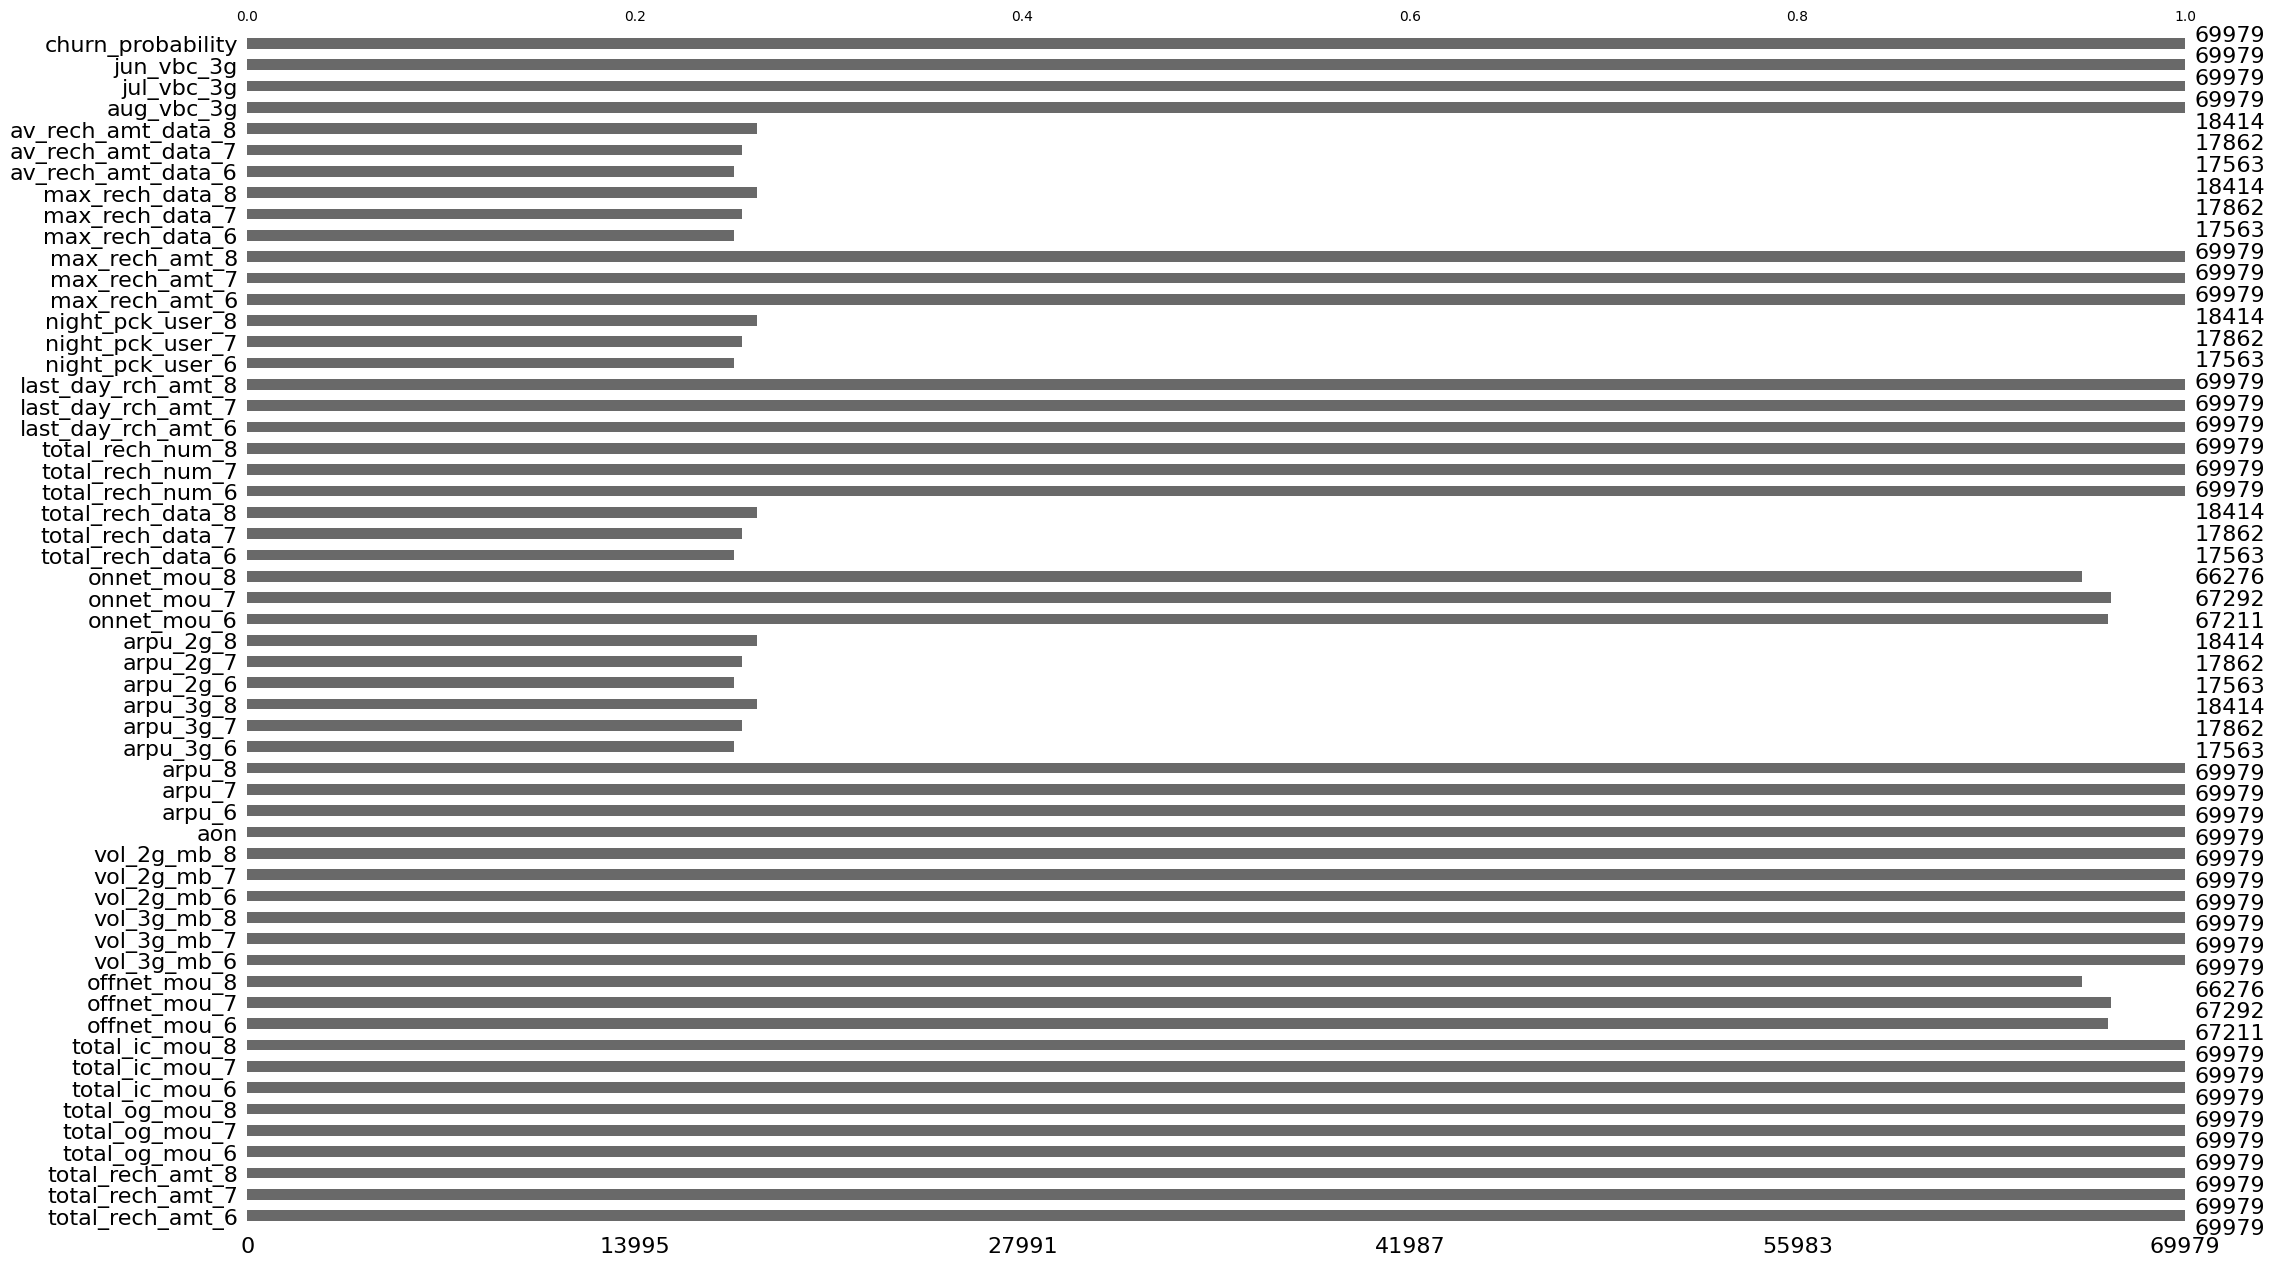

In [11]:
msno.bar(data_telecom[20:])

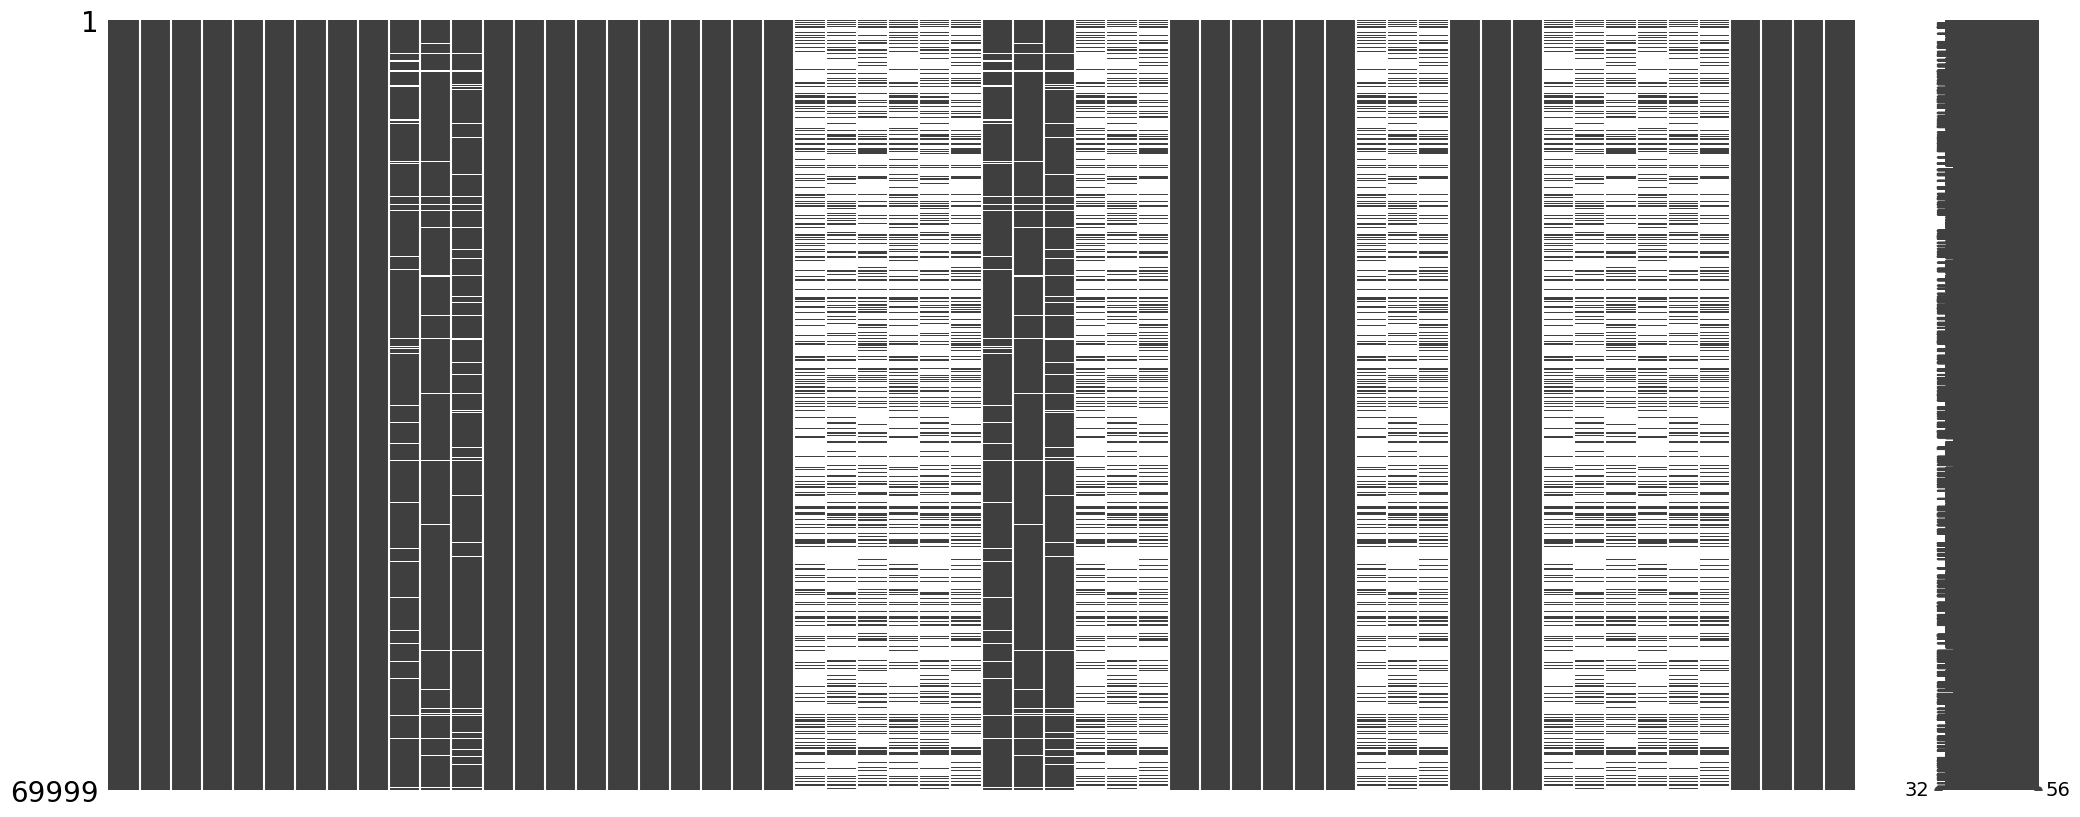

In [12]:
msno.matrix(data_telecom)

Lets also calculate the % missing data for each column:

In [13]:
data_msd = data_telecom.reset_index()
missing_data_percent = 100*data_msd.isnull().sum()/len(data_msd[target_variable])
missing_data_percent.sort_values(ascending=False)

night_pck_user_6      74.902499
total_rech_data_6     74.902499
av_rech_amt_data_6    74.902499
max_rech_data_6       74.902499
arpu_2g_6             74.902499
arpu_3g_6             74.902499
total_rech_data_7     74.478207
av_rech_amt_data_7    74.478207
arpu_2g_7             74.478207
max_rech_data_7       74.478207
arpu_3g_7             74.478207
night_pck_user_7      74.478207
arpu_2g_8             73.689624
total_rech_data_8     73.689624
arpu_3g_8             73.689624
night_pck_user_8      73.689624
max_rech_data_8       73.689624
av_rech_amt_data_8    73.689624
offnet_mou_8           5.290076
onnet_mou_8            5.290076
onnet_mou_6            3.954342
offnet_mou_6           3.954342
offnet_mou_7           3.838626
onnet_mou_7            3.838626
vol_3g_mb_6            0.000000
vol_3g_mb_7            0.000000
vol_3g_mb_8            0.000000
total_ic_mou_8         0.000000
vol_2g_mb_7            0.000000
total_ic_mou_7         0.000000
total_ic_mou_6         0.000000
total_og

Since too much missing information would make a column not really a great predictor for churn, we drop these columns and keep only the ones which have less than 70% missing data.

In [14]:
new_vars = missing_data_percent[missing_data_percent.le(70)].index
data_telecom= data_msd[new_vars]

In [15]:
data_telecom.head()

id  total_rech_amt_6  total_rech_amt_7  total_rech_amt_8  total_og_mou_6  \
0   0                77                65                10           81.21   
1   1                 0               145                50            0.00   
2   2                70               120                 0           56.49   
3   3               160               240               130           76.03   
4   4               290               136               122           63.26   

   total_og_mou_7  total_og_mou_8  total_ic_mou_6  total_ic_mou_7  \
0          221.68            3.63           11.84           53.04   
1           30.73           31.66            3.44           39.44   
2           99.36            0.00          124.29           33.83   
3           95.98           53.84           95.11           50.18   
4           42.94           15.76           21.54            9.36   

   total_ic_mou_8  offnet_mou_6  offnet_mou_7  offnet_mou_8  vol_3g_mb_6  \
0           40.56         32.24         96.68          2.33          0.0   
1           25.04          0.00         25.99         30.89          0.0   
2           36.64         53.99         82.05          0.00          0.0   
3           83.84         68.76         78.48         50.23          0.0   
4           28.31         56.99         38.11          9.63          0.0   

   vol_3g_mb_7  vol_3g_mb_8  vol_2g_mb_6  vol_2g_mb_7  vol_2g_mb_8   aon  \
0         0.00          0.0          0.0         0.00         0.00  1958   
1         3.96          0.0          0.0       352.91         0.00   710   
2         0.00          0.0          0.0         0.00         0.00   882   
3         0.00          0.0          0.0         0.00         0.00   982   
4         0.00          0.0        390.8       308.89       213.47   647   

    arpu_6   arpu_7   arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  \
0   31.277   87.009    7.527        48.58       124.38         1.29   
1    0.000  122.787   42.953         0.00         0.00         0.00   
2   60.806  103.176    0.000         0.53        15.93         0.00   
3  156.362  205.260  111.095         7.26        16.01         0.00   
4  240.708  128.191  101.565        21.28         4.83         6.13   

   total_rech_num_6  total_rech_num_7  total_rech_num_8  last_day_rch_amt_6  \
0                 3                 2                 2                  65   
1                 3                 4                 5                   0   
2                 2                 4                 2                  70   
3                 2                 4                 3                 110   
4                13                10                 8                  25   

   last_day_rch_amt_7  last_day_rch_amt_8  max_rech_amt_6  max_rech_amt_7  \
0                  65                   0              65              65   
1                   0                   0               0             145   
2                  50                   0              70              70   
3                 110                  50             110             110   
4                  10                  30              50              41   

   max_rech_amt_8  aug_vbc_3g  jul_vbc_3g  jun_vbc_3g  churn_probability  
0              10         0.0         0.0         0.0                  0  
1              50         0.0         0.0         0.0                  0  
2               0         0.0         0.0         0.0                  0  
3              50         0.0         0.0         0.0                  0  
4              30         0.0         0.0         0.0                  0

From 172, we have reduced column count to 39, lets see statistics for these fields before proceeding for EDA

In [16]:
data_telecom.describe()

id  total_rech_amt_6  total_rech_amt_7  total_rech_amt_8  \
count  69999.000000      69999.000000      69999.000000      69999.000000   
mean   34999.000000        328.139788        322.376363        323.846355   
std    20207.115084        404.211068        411.070120        426.181405   
min        0.000000          0.000000          0.000000          0.000000   
25%    17499.500000        110.000000        100.000000         90.000000   
50%    34999.000000        229.000000        220.000000        225.000000   
75%    52498.500000        438.000000        430.000000        436.000000   
max    69998.000000      35190.000000      40335.000000      45320.000000   

       total_og_mou_6  total_og_mou_7  total_og_mou_8  total_ic_mou_6  \
count    69999.000000    69999.000000    69999.000000    69999.000000   
mean       306.451436      310.572674      304.513065      199.710640   
std        465.502866      479.131770      477.936832      290.114823   
min          0.000000        0.000000        0.000000        0.000000   
25%         44.780000       42.910000       38.710000       38.640000   
50%        145.280000      141.230000      138.360000      114.780000   
75%        374.305000      380.045000      370.895000      251.070000   
max      10674.030000     8285.640000    14043.060000     7716.140000   

       total_ic_mou_7  total_ic_mou_8  offnet_mou_6  offnet_mou_7  \
count    69999.000000    69999.000000  67231.000000  67312.000000   
mean       201.878029      198.486034    198.874771    197.153383   
std        296.771338      288.336731    316.818355    322.482226   
min          0.000000        0.000000      0.000000      0.000000   
25%         41.340000       38.290000     34.860000     32.240000   
50%        116.330000      114.610000     96.480000     91.885000   
75%        249.470000      249.710000    232.990000    227.630000   
max       9699.010000    10830.380000   8362.360000   7043.980000   

       offnet_mou_8   vol_3g_mb_6   vol_3g_mb_7   vol_3g_mb_8   vol_2g_mb_6  \
count  66296.000000  69999.000000  69999.000000  69999.000000  69999.000000   
mean     196.543577    122.171882    128.934444    135.486541     51.773924   
std      324.089234    554.869965    554.096072    568.310234    212.513909   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%       31.575000      0.000000      0.000000      0.000000      0.000000   
50%       91.800000      0.000000      0.000000      0.000000      0.000000   
75%      229.345000      0.000000      0.000000      0.000000      0.000000   
max    14007.340000  45735.400000  28144.120000  30036.060000  10285.900000   

        vol_2g_mb_7   vol_2g_mb_8           aon        arpu_6        arpu_7  \
count  69999.000000  69999.000000  69999.000000  69999.000000  69999.000000   
mean      51.240204     50.127506   1220.639709    283.134365    278.185912   
std      211.114667    213.101403    952.426321    334.213918    344.366927   
min        0.000000      0.000000    180.000000  -2258.709000  -1289.715000   
25%        0.000000      0.000000    468.000000     93.581000     86.714000   
50%        0.000000      0.000000    868.000000    197.484000    191.588000   
75%        0.000000      0.000000   1813.000000    370.791000    365.369500   
max     7873.550000  11117.610000   4337.000000  27731.088000  35145.834000   

             arpu_8   onnet_mou_6   onnet_mou_7   onnet_mou_8  \
count  69999.000000  67231.000000  67312.000000  66296.000000   
mean     278.858826    133.153275    133.894438    132.978257   
std      351.924315    299.963093    311.277193    311.896596   
min     -945.808000      0.000000      0.000000      0.000000   
25%       84.095000      7.410000      6.675000      6.410000   
50%      192.234000     34.110000     32.280000     32.100000   
75%      369.909000    119.390000    115.837500    115.060000   
max    33543.624000   7376.710000   8157.780000  10752.560000   

       total_rech_num_6  total_re

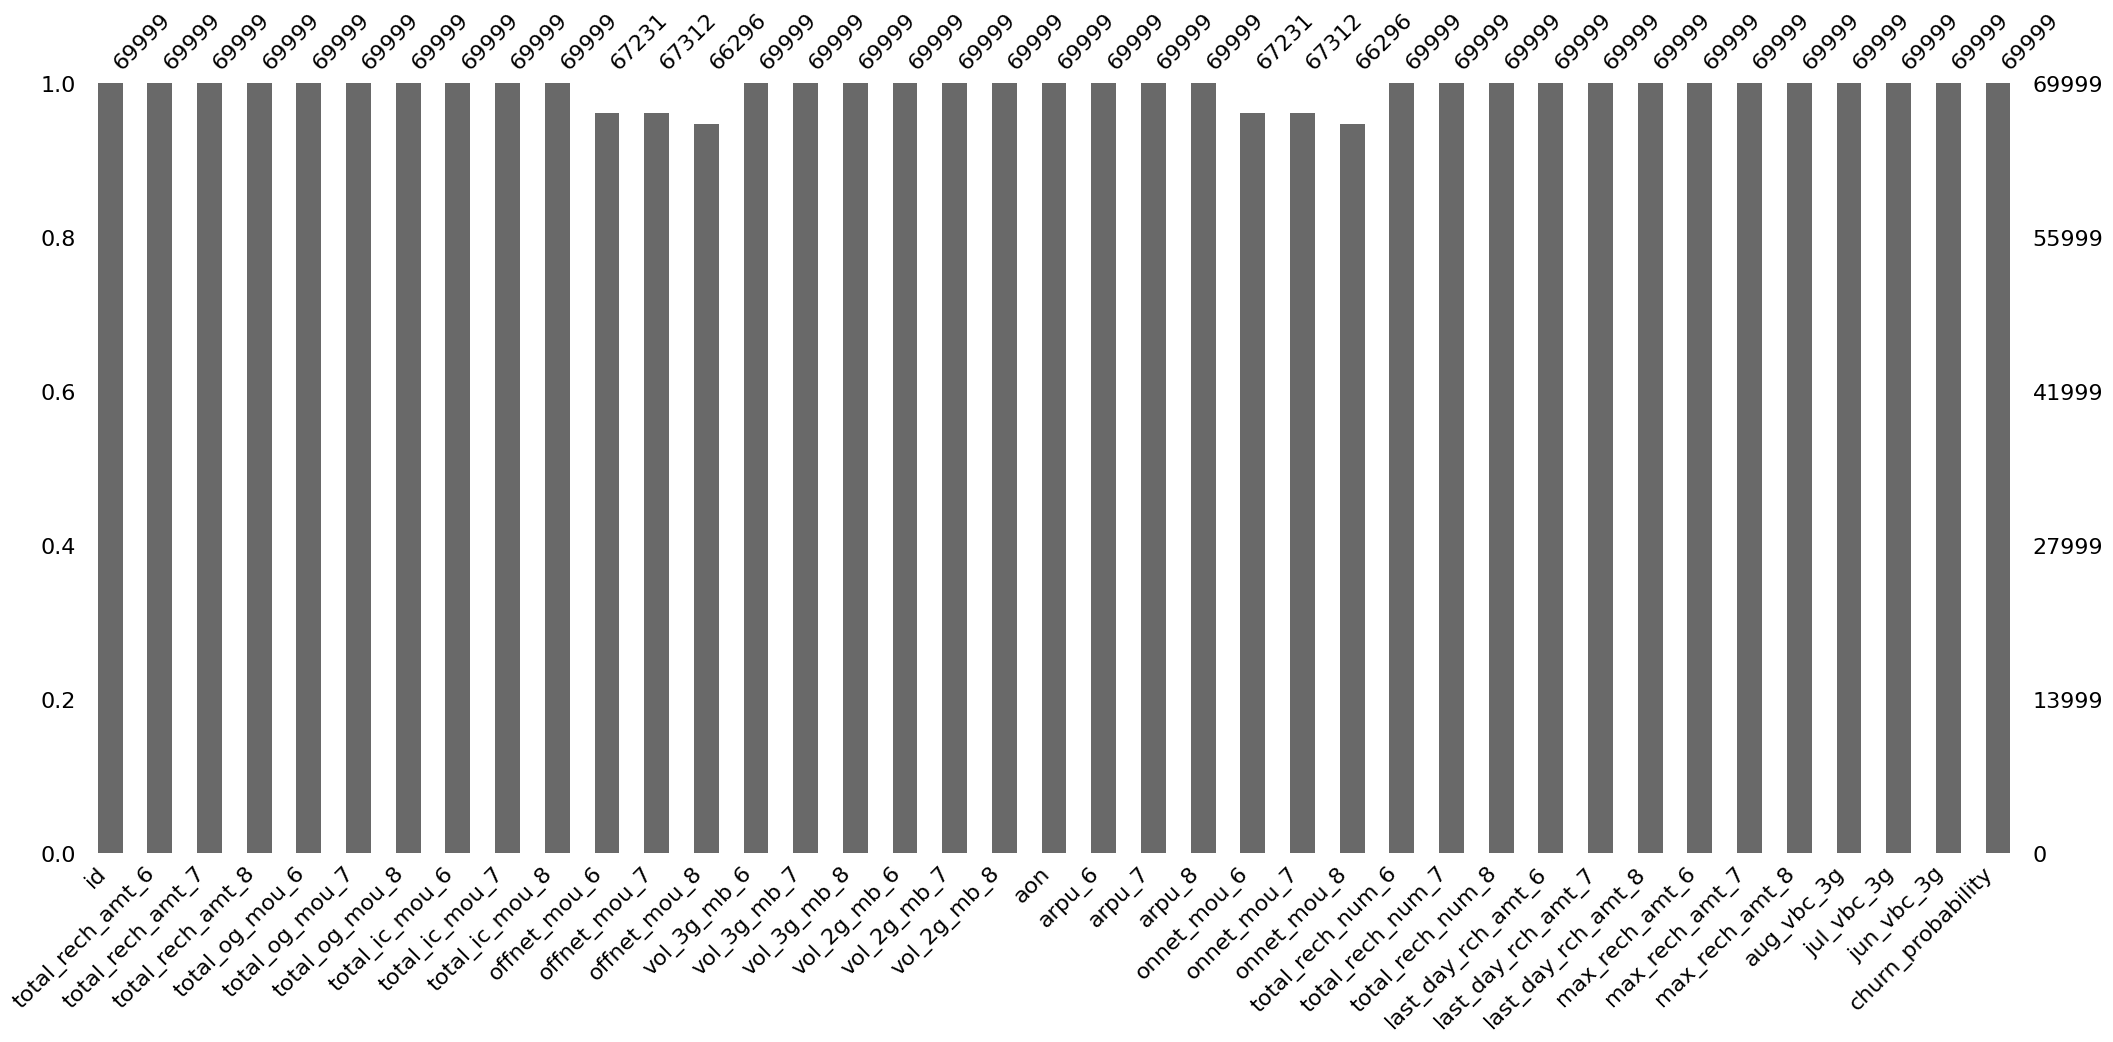

In [17]:
msno.bar(data_telecom)

##### Handling Missing data

Next, we try imputation on variables with any amount of missing data still left.

In [18]:
missing_data_percent = data_telecom.isnull().any()
impute_cols = missing_data_percent[missing_data_percent.gt(0)].index
impute_cols

Index(['offnet_mou_6', 'offnet_mou_7', 'offnet_mou_8', 'onnet_mou_6',
       'onnet_mou_7', 'onnet_mou_8'],
      dtype='object')

Using simple imputation with constant values as zeros as these are outgoing minutes

In [19]:
imp = SimpleImputer(strategy='constant', fill_value=0)
data_telecom[impute_cols] = imp.fit_transform(data_telecom[impute_cols])

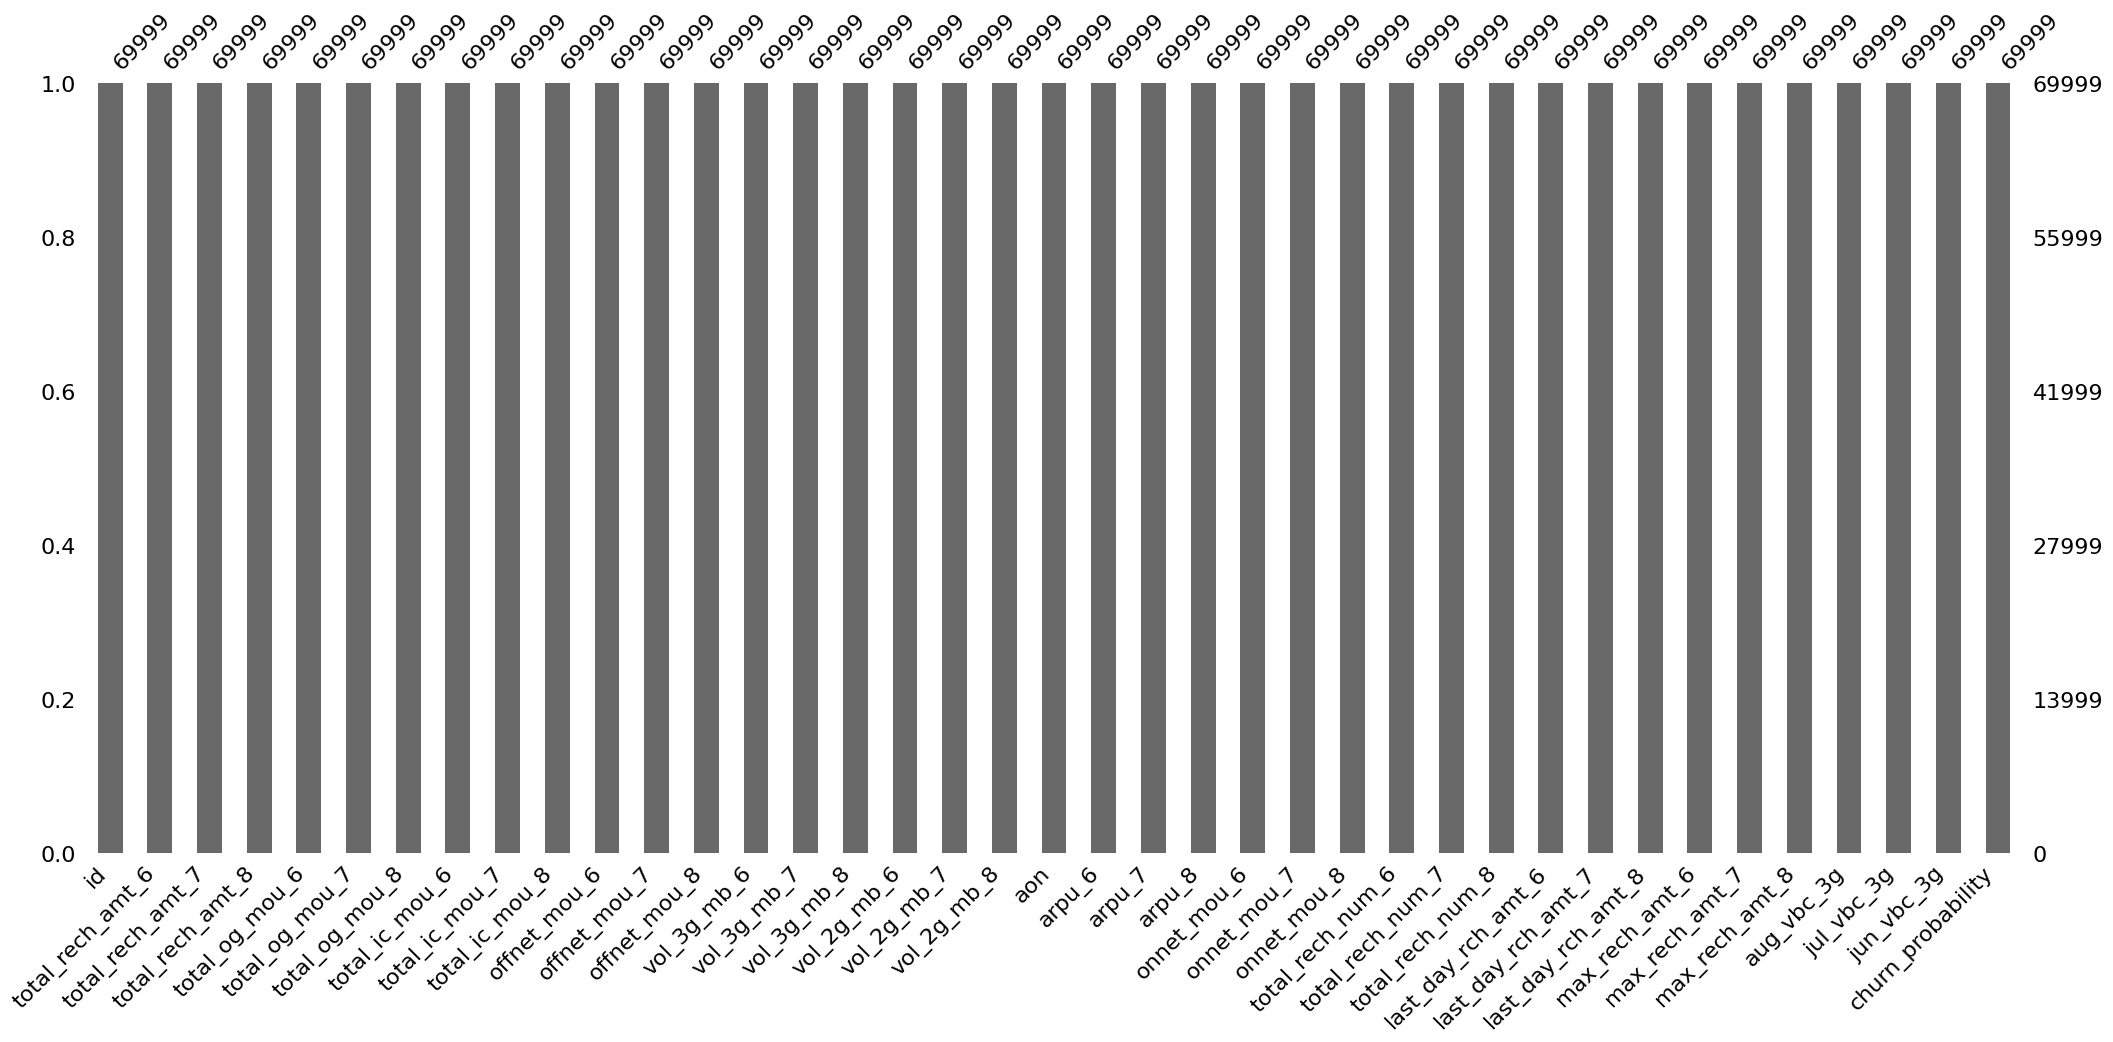

In [20]:
msno.bar(data_telecom)

In [21]:
data_telecom.describe()

id  total_rech_amt_6  total_rech_amt_7  total_rech_amt_8  \
count  69999.000000      69999.000000      69999.000000      69999.000000   
mean   34999.000000        328.139788        322.376363        323.846355   
std    20207.115084        404.211068        411.070120        426.181405   
min        0.000000          0.000000          0.000000          0.000000   
25%    17499.500000        110.000000        100.000000         90.000000   
50%    34999.000000        229.000000        220.000000        225.000000   
75%    52498.500000        438.000000        430.000000        436.000000   
max    69998.000000      35190.000000      40335.000000      45320.000000   

       total_og_mou_6  total_og_mou_7  total_og_mou_8  total_ic_mou_6  \
count    69999.000000    69999.000000    69999.000000    69999.000000   
mean       306.451436      310.572674      304.513065      199.710640   
std        465.502866      479.131770      477.936832      290.114823   
min          0.000000        0.000000        0.000000        0.000000   
25%         44.780000       42.910000       38.710000       38.640000   
50%        145.280000      141.230000      138.360000      114.780000   
75%        374.305000      380.045000      370.895000      251.070000   
max      10674.030000     8285.640000    14043.060000     7716.140000   

       total_ic_mou_7  total_ic_mou_8  offnet_mou_6  offnet_mou_7  \
count    69999.000000    69999.000000  69999.000000  69999.000000   
mean       201.878029      198.486034    191.010582    189.585401   
std        296.771338      288.336731    312.900706    318.492632   
min          0.000000        0.000000      0.000000      0.000000   
25%         41.340000       38.290000     28.790000     26.690000   
50%        116.330000      114.610000     89.810000     85.590000   
75%        249.470000      249.710000    223.540000    218.350000   
max       9699.010000    10830.380000   8362.360000   7043.980000   

       offnet_mou_8   vol_3g_mb_6   vol_3g_mb_7   vol_3g_mb_8   vol_2g_mb_6  \
count  69999.000000  69999.000000  69999.000000  69999.000000  69999.000000   
mean     186.146273    122.171882    128.934444    135.486541     51.773924   
std      318.453812    554.869965    554.096072    568.310234    212.513909   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%       23.780000      0.000000      0.000000      0.000000      0.000000   
50%       83.010000      0.000000      0.000000      0.000000      0.000000   
75%      216.410000      0.000000      0.000000      0.000000      0.000000   
max    14007.340000  45735.400000  28144.120000  30036.060000  10285.900000   

        vol_2g_mb_7   vol_2g_mb_8           aon        arpu_6        arpu_7  \
count  69999.000000  69999.000000  69999.000000  69999.000000  69999.000000   
mean      51.240204     50.127506   1220.639709    283.134365    278.185912   
std      211.114667    213.101403    952.426321    334.213918    344.366927   
min        0.000000      0.000000    180.000000  -2258.709000  -1289.715000   
25%        0.000000      0.000000    468.000000     93.581000     86.714000   
50%        0.000000      0.000000    868.000000    197.484000    191.588000   
75%        0.000000      0.000000   1813.000000    370.791000    365.369500   
max     7873.550000  11117.610000   4337.000000  27731.088000  35145.834000   

             arpu_8   onnet_mou_6   onnet_mou_7   onnet_mou_8  \
count  69999.000000  69999.000000  69999.000000  69999.000000   
mean     278.858826    127.887939    128.754731    125.943607   
std      351.924315    295.115497    306.326345    304.990552   
min     -945.808000      0.000000      0.000000      0.000000   
25%       84.095000      5.430000      4.910000      4.110000   
50%      192.234000     30.830000     29.160000     27.840000   
75%      369.909000    113.100000    108.940000    106.280000   
max    33543.624000   7376.710000   8157.780000  10752.560000   

       total_rech_num_6  total_re

No missing data is left, we can proceed with data analysis now

In [22]:
data_telecom.set_index("id", inplace=True)

In [23]:
variables=data_telecom.columns.to_list()
variables.remove(target_variable[0])

In [24]:
#Creating X and y variables
X = data_telecom[variables]
y = data_telecom[target_variable]

Filter high-value customers


In [25]:
# Calculating average recharge value for 6 and 7 months
data_telecom['avg_rech_amt_6_7'] = (data_telecom['total_rech_amt_6'] + data_telecom['total_rech_amt_7'])/2

In [26]:
rech_60percentile = data_telecom['avg_rech_amt_6_7'].quantile(0.6)
data_telecom = data_telecom[data_telecom['avg_rech_amt_6_7'] >= rech_60percentile]
data_telecom.head()

total_rech_amt_6  total_rech_amt_7  total_rech_amt_8  total_og_mou_6  \
id                                                                         
11               410               220               460          181.94   
12               521               418               365          816.44   
14               530               170               300          228.68   
15               654               400               652          327.64   
22               361               371               327          498.23   

    total_og_mou_7  total_og_mou_8  total_ic_mou_6  total_ic_mou_7  \
id                                                                   
11          129.09          270.53          133.93          154.68   
12          836.23          687.41           34.49           35.34   
14          210.46          227.41          414.71          336.78   
15          366.79          391.53          233.18          777.39   
22          543.16          436.23          238.29          545.58   

    total_ic_mou_8  offnet_mou_6  offnet_mou_7  offnet_mou_8  vol_3g_mb_6  \
id                                                                          
11          281.98         46.39         65.48         92.81          0.0   
12           26.99        571.98        727.91        644.43          0.0   
14          369.53         98.51         94.11        150.61          0.0   
15          629.94        317.11        341.79        197.09          0.0   
22          565.38        335.41        255.18        281.06          0.0   

    vol_3g_mb_7  vol_3g_mb_8  vol_2g_mb_6  vol_2g_mb_7  vol_2g_mb_8   aon  \
id                                                                          
11          0.0          0.0         0.00          0.0         0.00   648   
12          0.0          0.0         0.00          0.0         0.00   322   
14          0.0          0.0         0.00          0.0         0.00  1049   
15          0.0          0.0       260.42          0.0       354.35   602   
22          0.0          0.0         0.00          0.0         0.00  2837   

     arpu_6   arpu_7   arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  \
id                                                                     
11  292.724  228.753  418.233       135.54        63.61       177.36   
12  439.919  397.946  392.024       244.46       108.31        42.98   
14  340.266  205.397  191.780       123.76       116.34        75.93   
15  580.549  377.294  338.286        10.43        24.99       194.43   
22  277.458  283.346  231.755       179.54       287.98       155.16   

    total_rech_num_6  total_rech_num_7  total_rech_num_8  last_day_rch_amt_6  \
id                                                                             
11                10                 6                 8                 110   
12                15                10                20                 110   
14                 7                 3                 2                 110   
15                 5                 3                 4                   0   
22                 6                 5                 3                  33   

    last_day_rch_amt_7  last_day_rch_amt_8  max_rech_amt_6  max_rech_amt_7  \
id                                                                           
11                  50                  50             110              50   
12                   0                   0             110             110   
14                 120                 150             150             120   
15                 150                 250             250             250   
22                   0                  48             169             169   

    max_rech_amt_8  aug_vbc_3g  jul_vbc_3g  jun_vbc_3g  churn_probability  \
id                                                                          
11             130         0.0         0.0         0.0                  0   
12              50         0.0         0.0         0.0  

In [27]:
data_telecom.shape

(28019, 39)

In [28]:
del data_telecom['avg_rech_amt_6_7']

## 3. EDA

#### 3.a Univariate Analysis

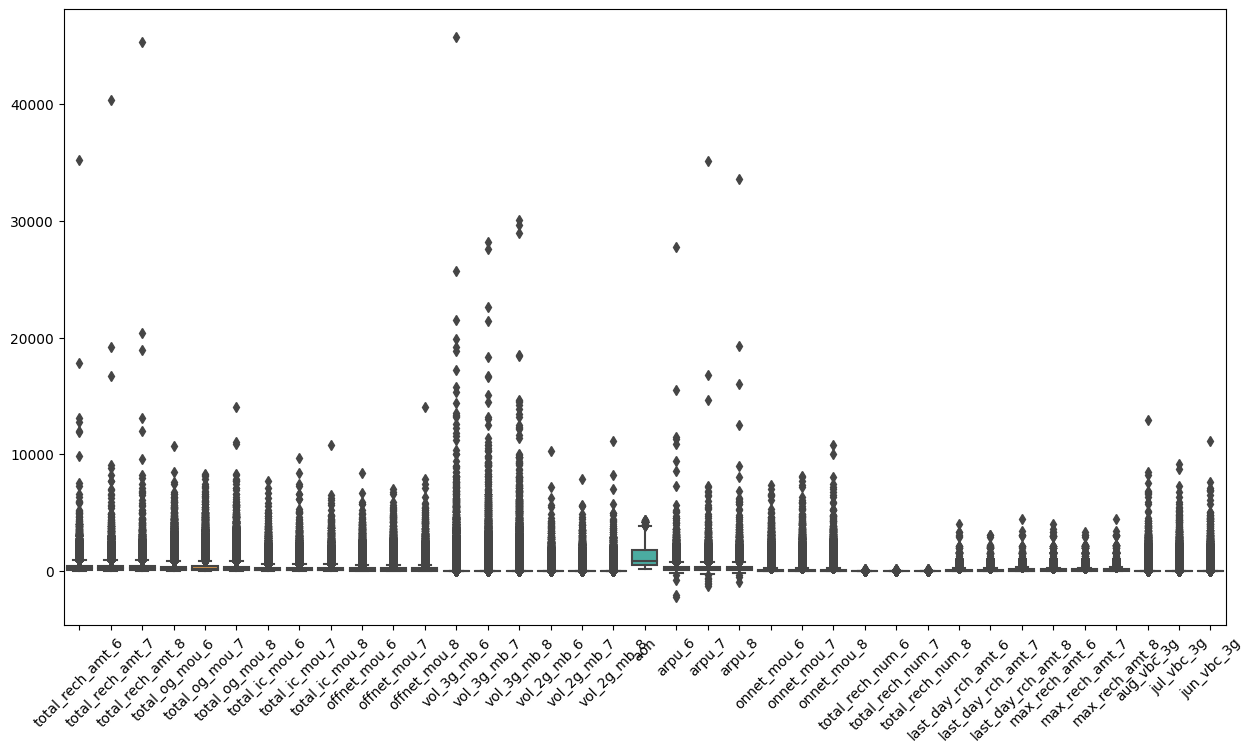

In [29]:
# Distribution of all variables
plt.figure(figsize=(15,8))
plt.xticks(rotation=45)
sns.boxplot(data = X)

##### Handling outliers

The box plots of features show there are a lot of outliers. These can be capped with k-sigma method.

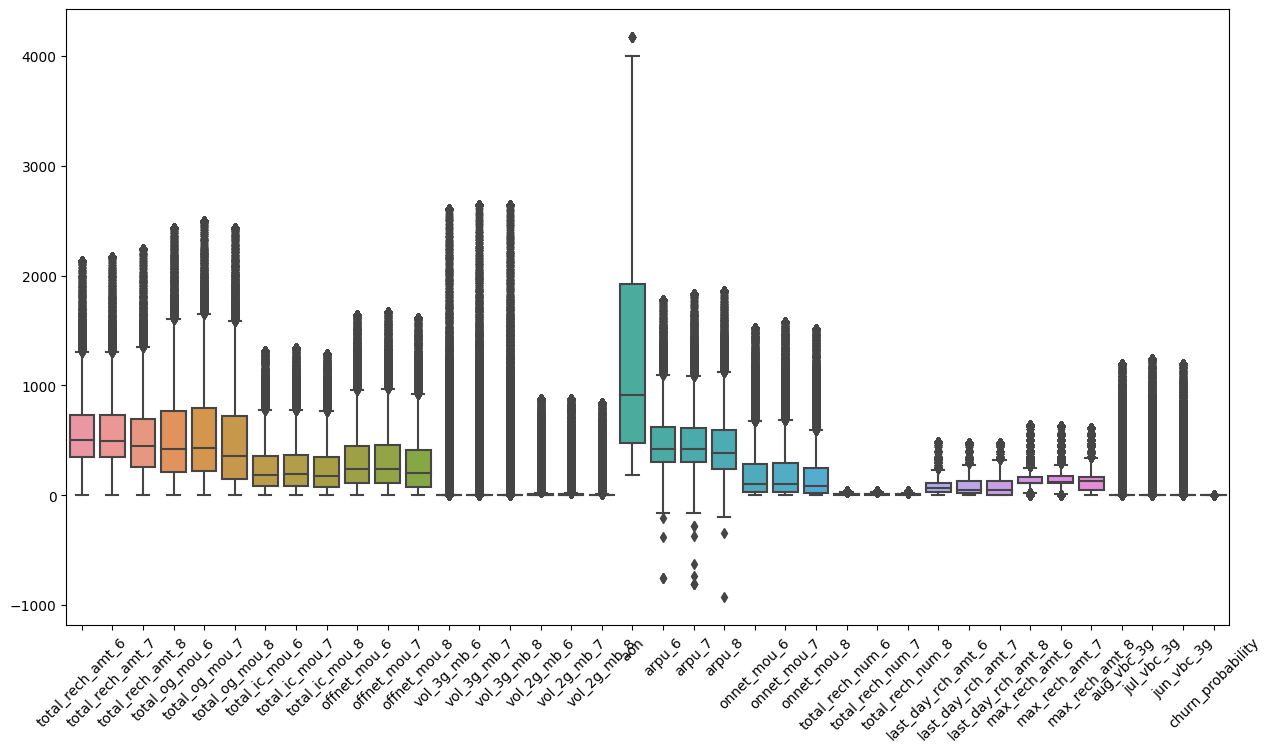

In [30]:
def cap_outliers(array, k=3):
    upper_limit = array.mean() + k*array.std()
    lower_limit = array.mean() - k*array.std()
    array[array<lower_limit] = lower_limit
    array[array>upper_limit] = upper_limit
    return array

data_telecom[variables] = data_telecom[variables].apply(cap_outliers, axis=0)

plt.figure(figsize=(15,8))
plt.xticks(rotation=45)
sns.boxplot(data = data_telecom)

#### 3.b Bivariate and Multivariate analysis

In [31]:
c = pd.DataFrame(data_telecom, columns=variables).corr()

In [32]:
c

total_rech_amt_6  total_rech_amt_7  total_rech_amt_8  \
total_rech_amt_6            1.000000          0.449525          0.430276   
total_rech_amt_7            0.449525          1.000000          0.615417   
total_rech_amt_8            0.430276          0.615417          1.000000   
total_og_mou_6              0.625331          0.336628          0.250943   
total_og_mou_7              0.351063          0.611071          0.441166   
total_og_mou_8              0.279126          0.486648          0.665661   
total_ic_mou_6              0.254902          0.128940          0.147023   
total_ic_mou_7              0.161221          0.234897          0.220146   
total_ic_mou_8              0.139544          0.211025          0.320788   
offnet_mou_6                0.554338          0.313748          0.248184   
offnet_mou_7                0.316833          0.535046          0.391645   
offnet_mou_8                0.267587          0.440860          0.592975   
vol_3g_mb_6                 0.215554          0.135897          0.137241   
vol_3g_mb_7                 0.138715          0.231047          0.178143   
vol_3g_mb_8                 0.141138          0.192315          0.273590   
vol_2g_mb_6                 0.049781          0.009430          0.021762   
vol_2g_mb_7                -0.007099          0.051944          0.028363   
vol_2g_mb_8                 0.006514          0.041863          0.096974   
aon                         0.004045          0.007103          0.046212   
arpu_6                      0.930338          0.510776          0.439601   
arpu_7                      0.540189          0.920618          0.662578   
arpu_8                      0.433295          0.674617          0.942627   
onnet_mou_6                 0.395028          0.202877          0.150992   
onnet_mou_7                 0.213545          0.377243          0.271084   
onnet_mou_8                 0.175886          0.315819          0.432691   
total_rech_num_6            0.410681          0.135662          0.114004   
total_rech_num_7            0.098595          0.375128          0.241358   
total_rech_num_8            0.091709          0.248413          0.456471   
last_day_rch_amt_6          0.323796          0.117813          0.148551   
last_day_rch_amt_7          0.105387          0.353286          0.182617   
last_day_rch_amt_8          0.151658          0.211170          0.404420   
max_rech_amt_6              0.424803          0.142064          0.188339   
max_rech_amt_7              0.150289          0.457132          0.235791   
max_rech_amt_8              0.231499          0.307612          0.535108   
aug_vbc_3g                  0.115843          0.158775          0.207363   
jul_vbc_3g                  0.127142          0.170440          0.149213   
jun_vbc_3g                  0.172940          0.117608          0.124590   

                    total_og_mou_6  total_og_mou_7  total_og_mou_8  \
total_rech_amt_6          0.625331        0.351063        0.279126   
total_rech_amt_7          0.336628        0.611071        0.486648   
total_rech_amt_8          0.250943        0.441166        0.665661   
total_og_mou_6            1.000000        0.641116        0.494744   
total_og_mou_7            0.641116        1.000000        0.751385   
total_og_mou_8            0.494744        0.751385        1.000000   
total_ic_mou_6            0.178262        0.037510        0.044554   
total_ic_mou_7            0.076549        0.148457        0.124577   
total_ic_mou_8            0.048103        0.105441        0.225579   
offnet_mou_6              0.711292        0.454563        0.354805   
offnet_mou_7              0.455095        0.710231        0.537204   
offnet_mou_8              0.355600        0.545697        0.737962   
vol_3g_mb_6              -0.135239       -0.156049       -0.122107   
vol_3g_mb_7              -0.141903       -0.142635       -0.107922   
vol_3g_mb_8              -0.127405       -0.126880       -0.080497   
vol_2g_mb_6

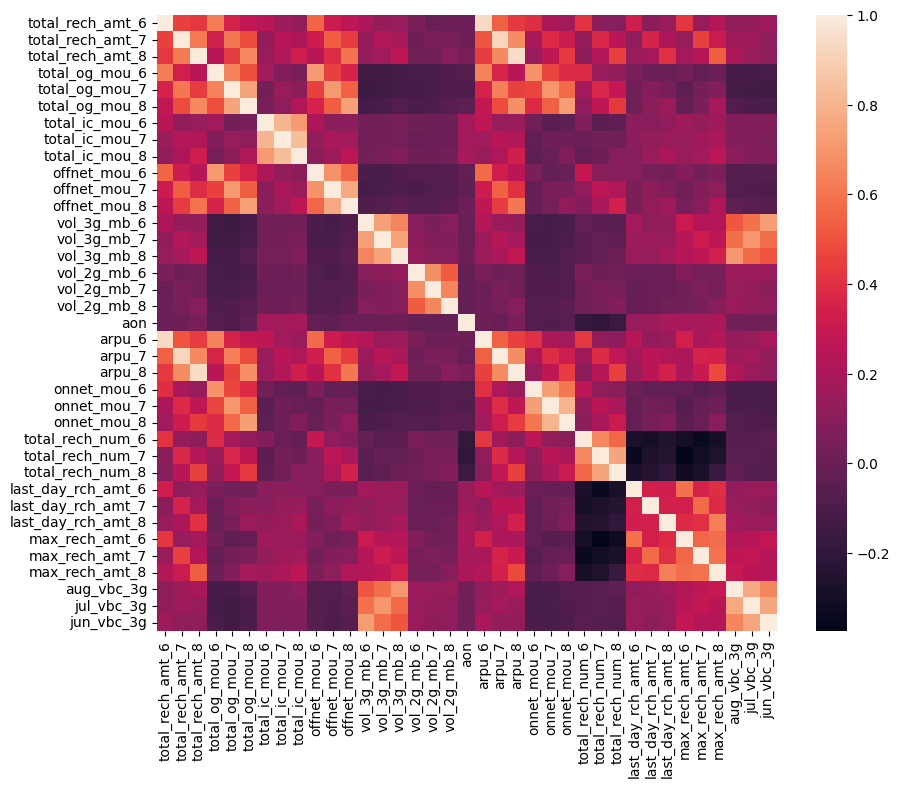

In [33]:
plt.figure(figsize=(10,8))
sns.heatmap(pd.DataFrame(data_telecom, columns=variables).corr())

Following columns can be dropped, as they have collinearity more than 75%
- total_rech_amt and arpu (dropping arpu) 
- onnet_mou and total_og_mou (dropping onnet_mou) 
- offet_mou and total_og_mou (dropping offet_mou) 
- total_ic_mou_6 and total_ic_mou_8 are highly correlated to total_ic_mou_7 and incoming call frequency may not effect the churn probability, hence dropping them

In [34]:
variables = list(set(variables) - set(['onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8','offnet_mou_6', 'offnet_mou_7','arpu_6', 'arpu_7','arpu_8','offnet_mou_8', "total_ic_mou_6", "total_ic_mou_8"]))

In [35]:
print(len(variables))
data_telecom = data_telecom[variables+target_variable]

26


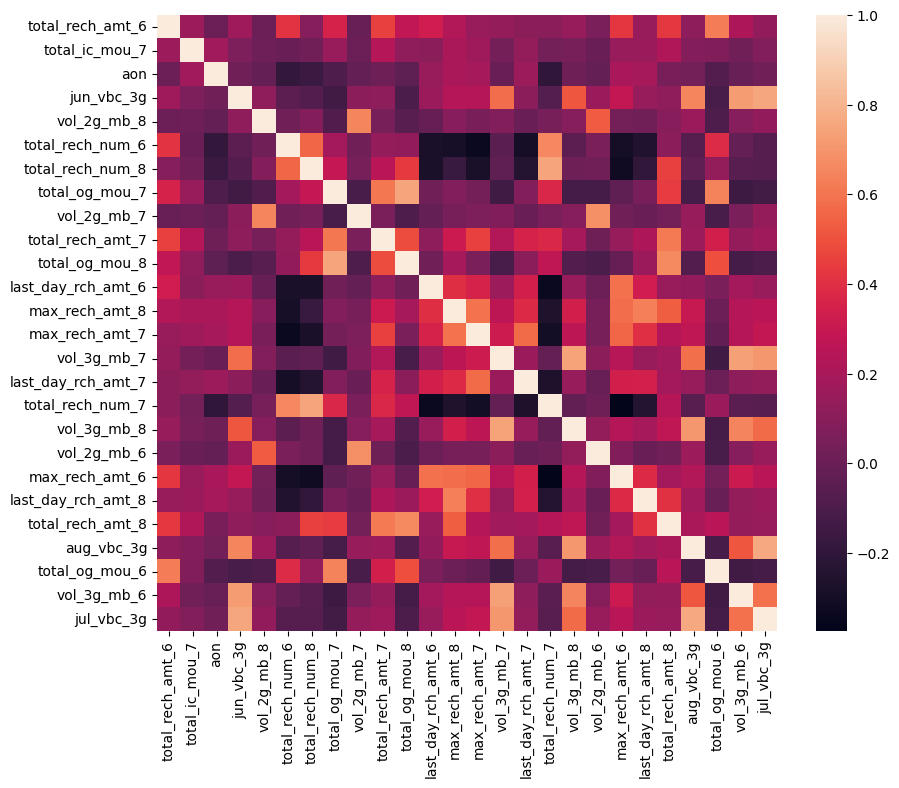

In [36]:
plt.figure(figsize=(10,8))
sns.heatmap(pd.DataFrame(data_telecom, columns=variables).corr())

Lets study trend of recharge across all three months for the people who churned

In [37]:
churned_data = data_telecom[data_telecom[target_variable[0]]==1]
churned_data

total_rech_amt_6  total_ic_mou_7     aon  jun_vbc_3g  vol_2g_mb_8  \
id                                                                         
76           715.000000           89.23   487.0        0.00         0.00   
84           736.000000          162.84   356.0        0.00         0.00   
139          384.000000           35.68   207.0        0.00       197.79   
177          704.000000           75.59   332.0        0.00         0.00   
183          658.000000          216.29  3052.0       99.46         0.00   
...                 ...             ...     ...         ...          ...   
69858        357.000000          850.14  2777.0        0.00         0.00   
69886       2135.742261           73.61   426.0        0.00         0.00   
69919        623.000000            0.00   711.0        0.00         0.00   
69950       1470.000000            0.00   326.0        0.00         0.00   
69983        342.000000           41.49   565.0        0.00         0.00   

       total_rech_num_6  total_rech_num_8  total_og_mou_7  vol_2g_mb_7  \
id                                                                       
76             12.00000               2.0            7.41         0.00   
84             11.00000               4.0         1144.53         0.00   
139            22.00000               9.0          181.11       349.09   
177            12.00000               5.0           18.33         0.00   
183             8.00000               0.0          227.91         0.00   
...                 ...               ...             ...          ...   
69858           8.00000              11.0          829.14         0.00   
69886          37.69453               0.0          185.83         0.00   
69919          16.00000               0.0            0.00         0.00   
69950          14.00000               4.0            0.00         0.00   
69983           4.00000               2.0          605.33         0.00   

       total_rech_amt_7  total_og_mou_8  last_day_rch_amt_6  max_rech_amt_8  \
id                                                                            
76                  0.0            0.00               110.0             0.0   
84                556.0            0.00                30.0             0.0   
139               270.0           81.28                20.0            30.0   
177               178.0            0.00               154.0             0.0   
183               541.0            0.00               250.0             0.0   
...                 ...             ...                 ...             ...   
69858             705.0          356.59                50.0           128.0   
69886             200.0            0.00                50.0             0.0   
69919               0.0            0.00                44.0             0.0   
69950               0.0            0.00               110.0             0.0   
69983             478.0          366.08               110.0            67.0   

       max_rech_amt_7  vol_3g_mb_7  last_day_rch_amt_7  total_rech_num_7  \
id                                                                         
76                0.0          0.0                 0.0               0.0   
84              110.0          0.0                20.0              18.0   
139              58.0          0.0                30.0              15.0   
177              50.0          0.0                30.0               8.0   
183             110.0          0.0                10.0               7.0   
...               ...          ...                 ...               ...   
69858           128.0          0.0               120.0               9.0   
69886            30.0          0.0                30.0              11.0   
69919             0.0          0.0                 0.0               0.0   
69950             0.0          0.0                 0.0               2.0   
69983           130.0          0.0               130.0               5.0   

       vol_3g_mb_8  vol_2g_mb_6  max_r

In [38]:
rech_vr = ["total_rech_amt_6",	"total_rech_amt_7",	"total_rech_amt_8"]
plt.figure(figsize=(20,8))
churned_data.reset_index(inplace=True)
# Create a line plot
churned_data[rech_vr][:100].plot(figsize=(20,8))

<Figure size 2000x800 with 0 Axes>

<Figure size 2000x800 with 0 Axes>

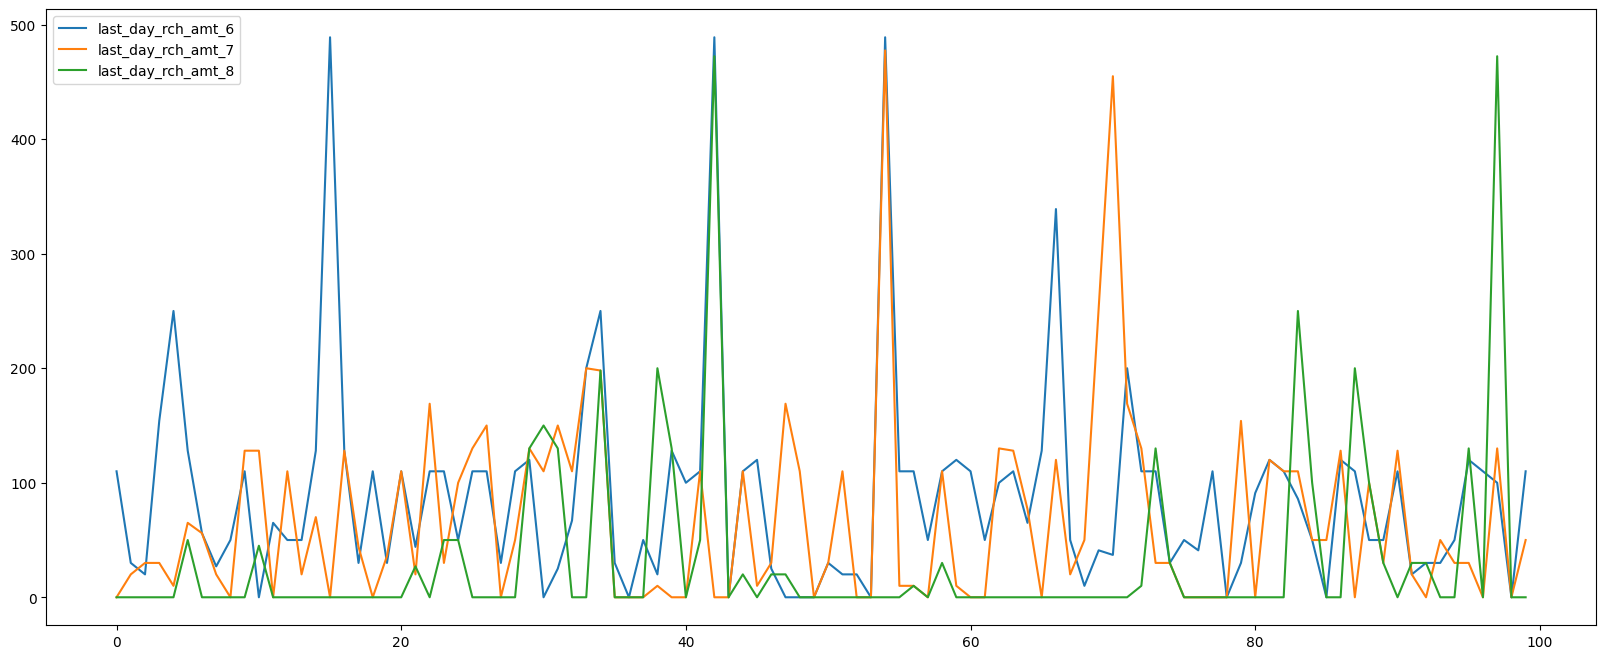

In [39]:
plt.figure(figsize=(20,8))
churned_data.reset_index(inplace=True)
# Create a line plot
churned_data[last_day_rch_amt][:100].plot(figsize=(20,8))

<Figure size 2000x800 with 0 Axes>

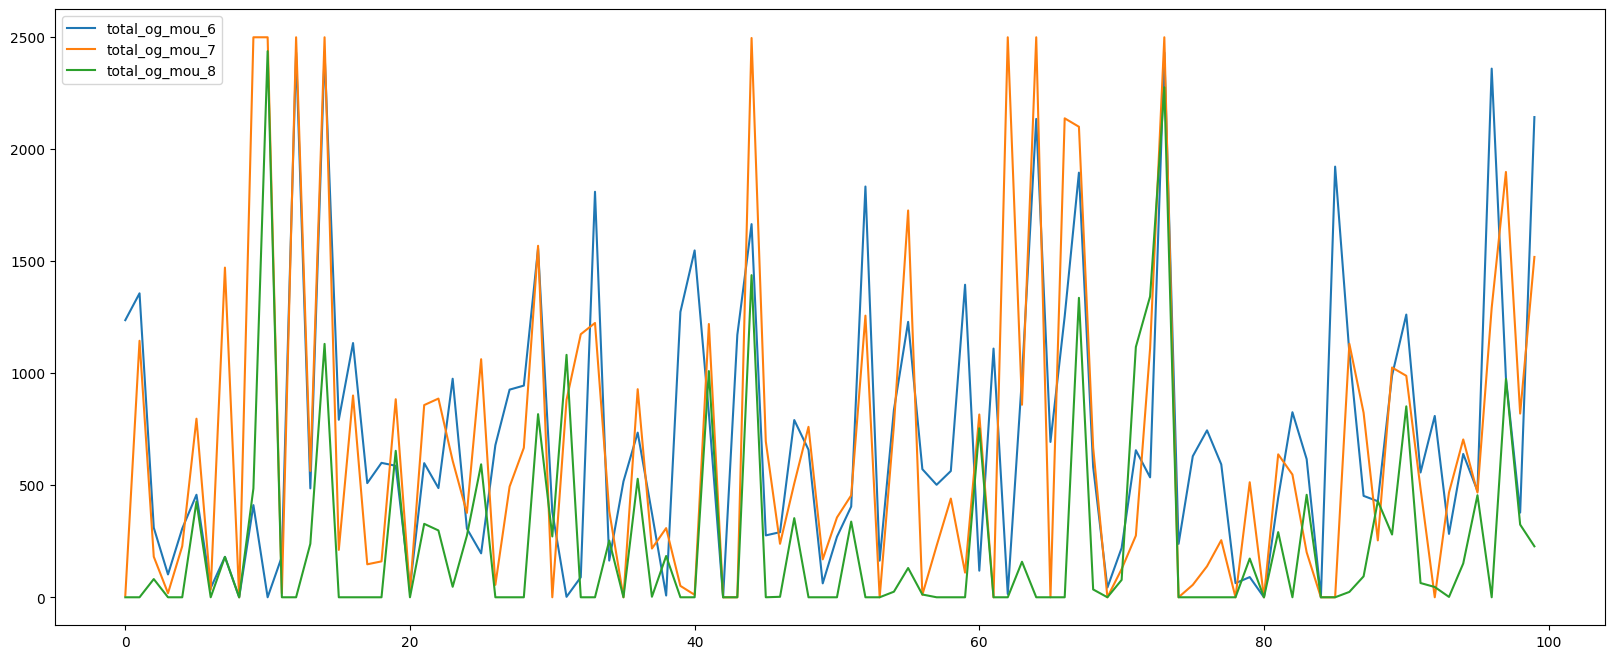

In [40]:
plt.figure(figsize=(20,8))
# Create a line plot
churned_data[total_outgoing_minutes][:100].plot(figsize=(20,8))

As a general observation, people who are likely to churn has less total recharge value in last month, total outgoing calls and last day's recharge amount is very low or almost 0

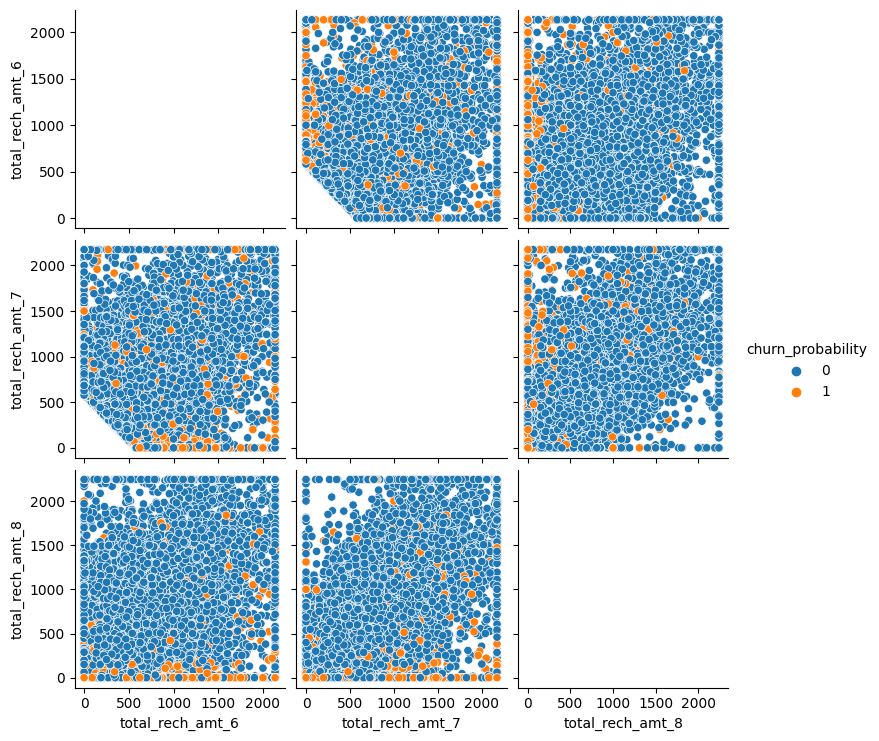

In [41]:
sns.pairplot(data=data_telecom[["total_rech_amt_6",	"total_rech_amt_7",	"total_rech_amt_8",'churn_probability']],hue='churn_probability',diag_kind='None')
plt.show()

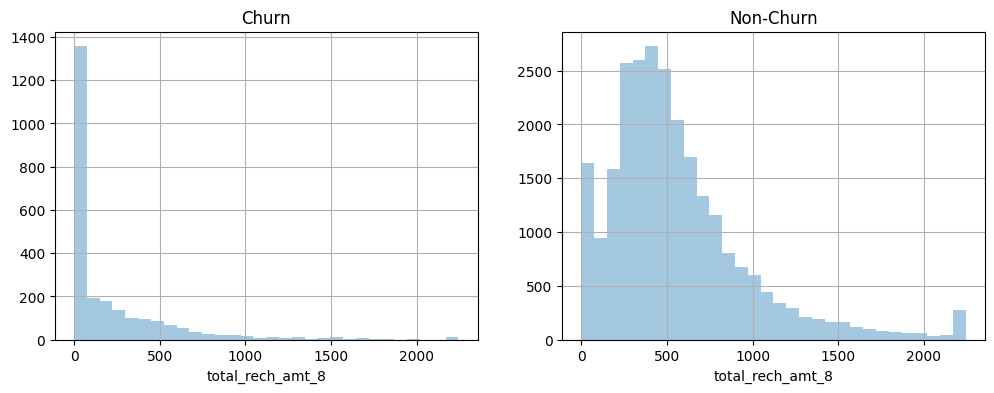

In [42]:
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(12, 4))
ax = sns.distplot(data_telecom[data_telecom['churn_probability']==1].total_rech_amt_8, bins = 30, ax = axes[0], kde = False)
ax.set_title('Churn')
ax.grid()
ax = sns.distplot(data_telecom[data_telecom['churn_probability']==0].total_rech_amt_8, bins = 30, ax = axes[1], kde = False)
ax.set_title('Non-Churn')
ax.grid()
plt.show()

Lets see if some data can be ignore where recharge amount is not that significant

In [43]:
data_telecom.groupby("churn_probability").mean()

total_rech_amt_6  total_ic_mou_7          aon  jun_vbc_3g  \
churn_probability                                                              
0                        586.574046      287.656562  1297.827617   92.341161   
1                        680.796760      159.560681   859.686844   64.793659   

                   vol_2g_mb_8  total_rech_num_6  total_rech_num_8  \
churn_probability                                                    
0                    57.589770         10.803633          9.748634   
1                    11.170665         12.554370          4.963371   

                   total_og_mou_7  vol_2g_mb_7  total_rech_amt_7  \
churn_probability                                                  
0                      594.774639    63.175435        596.145029   
1                      544.989132    39.197636        517.832201   

                   total_og_mou_8  last_day_rch_amt_6  max_rech_amt_8  \
churn_probability                                                       
0                      557.934953           91.558807      150.639185   
1                      187.570428           86.783998       68.453716   

                   max_rech_amt_7  vol_3g_mb_7  last_day_rch_amt_7  \
churn_probability                                                    
0                      155.031232   217.251899           92.671906   
1                      127.645504   110.402571           65.010752   

                   total_rech_num_7  vol_3g_mb_8  vol_2g_mb_6  max_rech_amt_6  \
churn_probability                                                               
0                         10.894937   217.146207    63.472994      151.346641   
1                         10.111746    40.252245    46.299560      144.359064   

                   last_day_rch_amt_8  total_rech_amt_8  aug_vbc_3g  \
churn_probability                                                     
0                           88.716696        556.825563  106.049714   
1                           26.389044        211.094539   23.848167   

                   total_og_mou_6  vol_3g_mb_6  jul_vbc_3g  
churn_probability                                           
0                      561.996261   198.951299  105.096415  
1                      720.954296   143.022659   53.547808

##### Target variable analysis

Lets study balance in target variable

In [44]:
round((y['churn_probability'].value_counts()*100 / y.shape[0]),2)

0    89.81
1    10.19
Name: churn_probability, dtype: float64

In [45]:
y.value_counts()

churn_probability
0                    62867
1                     7132
dtype: int64

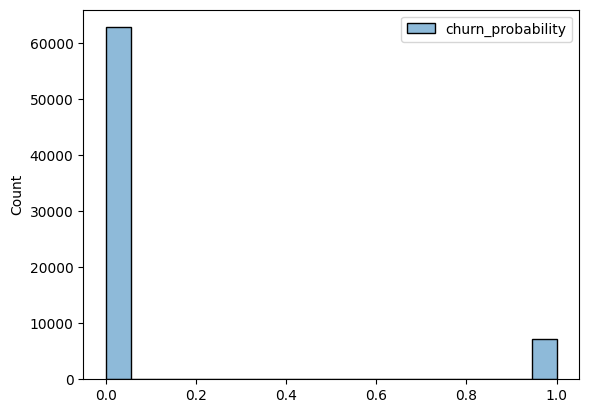

In [46]:
#Distribution for the churn probability
sns.histplot(y)

As data is imbalanced, we need to clean few rows, which may not impact the business and model accuracy as well.

## 4. Data Preparation & Preprocessing

##### 4.a. Train test data split

In [47]:
#Creating X and y variables
X = data_telecom[variables]
y = data_telecom[target_variable]

In [48]:
X.shape, y.shape

((28019, 26), (28019, 1))

Splitting train and test data to avoid any contamination of the test data

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((22415, 26), (5604, 26), (22415, 1), (5604, 1))

Check balance of splitted data

In [50]:
y_train.value_counts()
round((y_train['churn_probability'].value_counts()*100 / y_train.shape[0]),2)

0    91.16
1     8.84
Name: churn_probability, dtype: float64

In [51]:
round((y_test['churn_probability'].value_counts()*100 / y_test.shape[0]),2)

0    91.15
1     8.85
Name: churn_probability, dtype: float64

Dealing with data imbalance

We are creating synthetic samples by doing upsampling using SMOTE(Synthetic Minority Oversampling Technique).

In [52]:
# # Importing SMOTE
# from imblearn.over_sampling import SMOTE
# # Instantiate SMOTE
# sm = SMOTE(random_state=42)
# # Fitting SMOTE to the train set
# X_train, y_train = sm.fit_resample(X_train, y_train)
# y_train.value_counts()
# round((y_train['churn_probability'].value_counts()*100 / y_train.shape[0]),2)

In [53]:
# X_test, y_test = sm.fit_resample(X_test, y_test)
# y_test.value_counts()
# round((y_test['churn_probability'].value_counts()*100 / y_test.shape[0]),2)

##### 4.b. Feature Scaling

In [54]:
scale = StandardScaler()
X_train_scaled = scale.fit_transform(X_train)

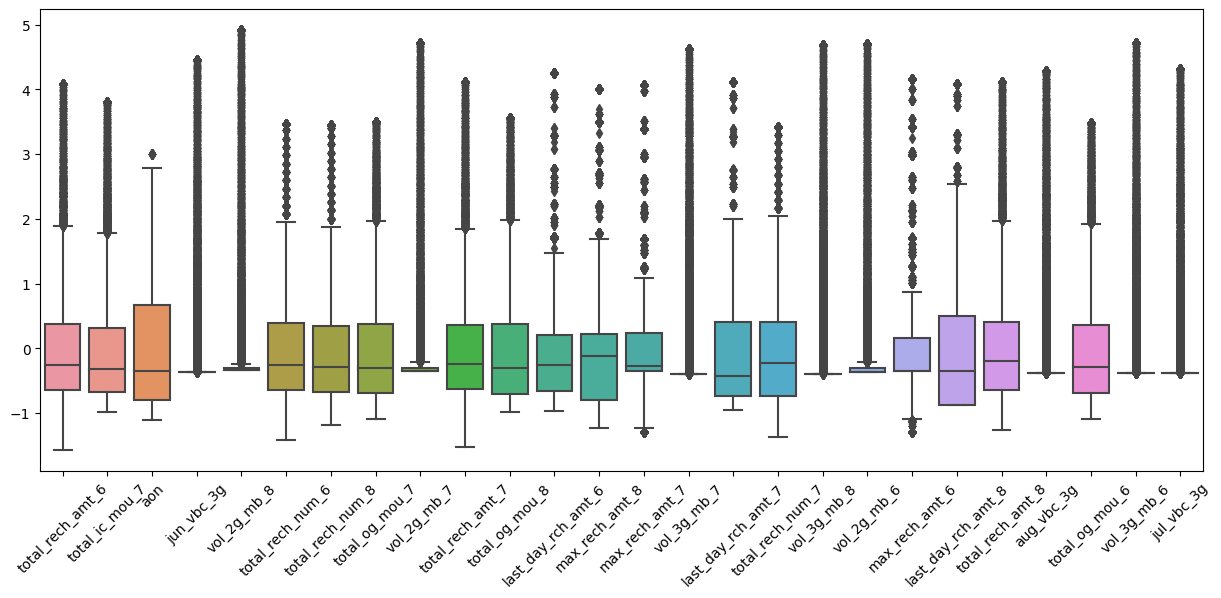

In [55]:
plt.figure(figsize=(15,6))
plt.xticks(rotation=45)
sns.boxplot(data = pd.DataFrame(X_train_scaled, columns=variables))

##### 4.c. Derived column and Dummy variables

There is no categorical variable, hence we will not need to create dummy variables

In [56]:
data_telecom["total_rech_amt"]= data_telecom["total_rech_amt_6"]+data_telecom["total_rech_amt_7"]+data_telecom["total_rech_amt_8"]

## 5: Feature Engineering using PCA

<BarContainer object of 26 artists>

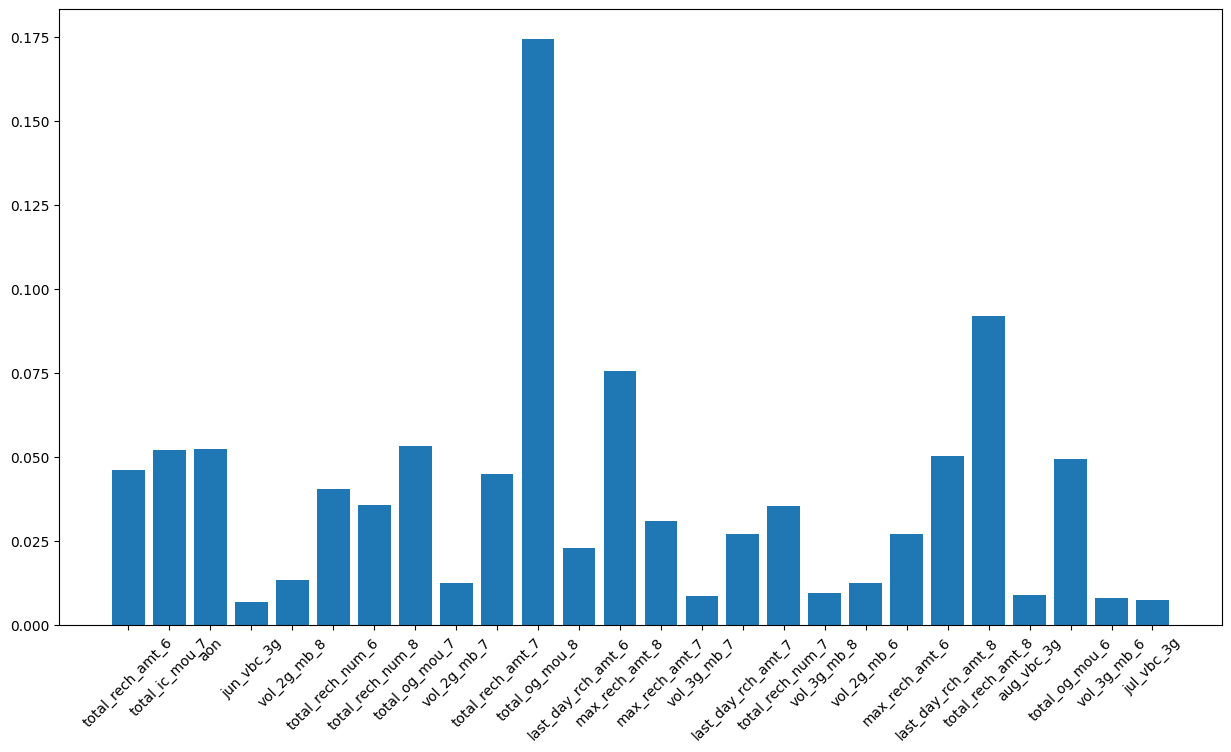

In [57]:
rf = RandomForestClassifier(n_estimators=100, n_jobs=-1)
rf.fit(X_train_scaled, y_train)
feature_importances = pd.DataFrame({'col':variables, 'importance':rf.feature_importances_})
plt.figure(figsize=(15,8))
plt.xticks(rotation=45)
plt.bar(feature_importances['col'], feature_importances['importance'])

Using PCA creates components which are a linear combination of the features.


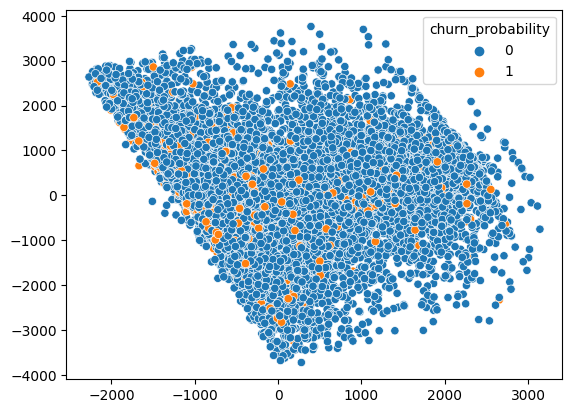

In [58]:
pca = PCA()
pca_components = pca.fit_transform(X_train)
sns.scatterplot(x=pca_components[:,0], y=pca_components[:,1], hue=y_train[target_variable[0]])

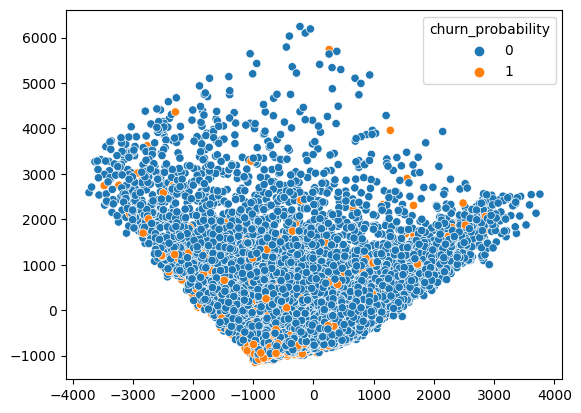

In [59]:
sns.scatterplot(x=pca_components[:,1], y=pca_components[:,2], hue=y_train[target_variable[0]])

In [60]:
pca.components_

array([[-5.01795555e-02,  3.78285796e-02,  9.28293387e-01,
         3.74734287e-02,  4.11177122e-03, -2.06017608e-03,
        -2.04917950e-03, -2.09592344e-01,  5.11591608e-03,
        -5.95262039e-02, -1.66252065e-01,  1.43083273e-02,
         2.28465259e-02,  2.39803851e-02,  8.03891032e-02,
         1.40843779e-02, -2.33218483e-03,  7.82017703e-02,
         7.26979670e-03,  2.55504015e-02,  1.70154689e-02,
        -4.29353137e-02,  4.08461769e-02, -1.77259454e-01,
         7.73020614e-02,  4.20415565e-02],
       [ 1.22830989e-01,  5.51346158e-02,  3.52278272e-01,
        -1.23725736e-01, -2.17927587e-02,  1.27202931e-03,
         1.80386755e-03,  4.20361594e-01, -2.60818505e-02,
         1.48657108e-01,  3.92967513e-01,  1.29332494e-03,
         4.51629640e-03, -4.38747891e-03, -3.31323156e-01,
         6.20790489e-03,  1.55238513e-03, -3.01971870e-01,
        -3.26974448e-02, -7.45680035e-03,  6.89539744e-03,
         1.57652891e-01, -1.22695721e-01,  3.58117233e-01,
        -3.14

Looking at the explained variance ratio for each component

In [61]:
pca.explained_variance_ratio_

array([2.74659206e-01, 2.39157894e-01, 2.21032436e-01, 5.93351406e-02,
       3.36970660e-02, 2.91299358e-02, 2.87196854e-02, 1.97589085e-02,
       1.86808987e-02, 1.83321767e-02, 1.45388472e-02, 9.61178117e-03,
       7.98324558e-03, 6.82007692e-03, 3.94205838e-03, 3.27542914e-03,
       2.81607479e-03, 2.25904808e-03, 1.60276433e-03, 1.58122934e-03,
       1.39552841e-03, 8.38545347e-04, 8.07477344e-04, 1.85960896e-05,
       3.65025305e-06, 2.30031809e-06])

Making a scree plot for the explained variance

In [62]:
var_cumu = np.cumsum(pca.explained_variance_ratio_)

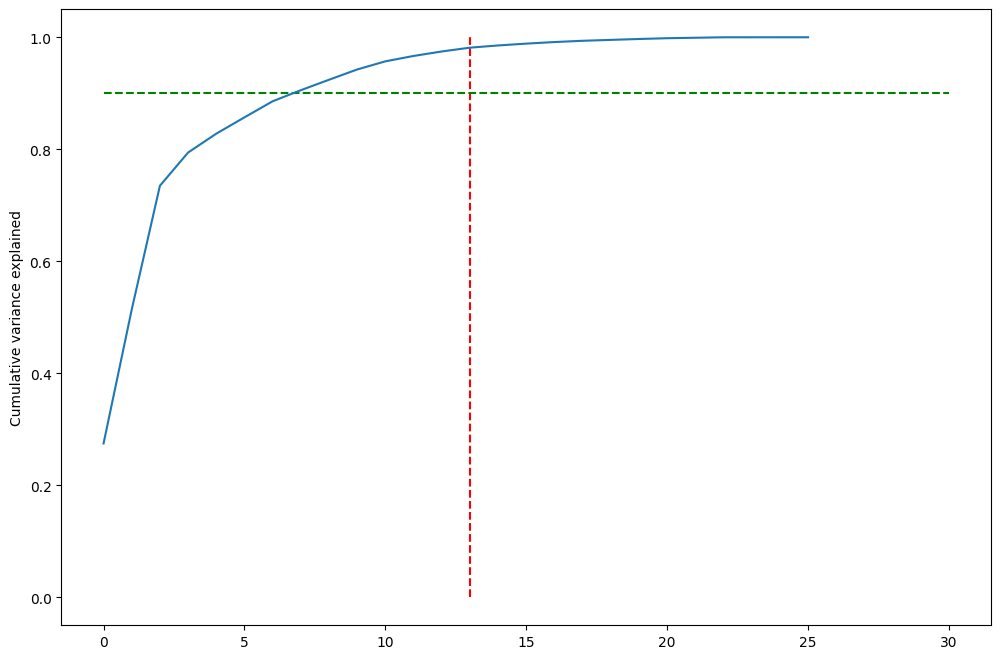

In [63]:
fig = plt.figure(figsize=[12,8])
plt.vlines(x=13, ymax=1, ymin=0, colors="r", linestyles="--")
plt.hlines(y=0.9, xmax=30, xmin=0, colors="g", linestyles="--")
plt.plot(var_cumu)
plt.ylabel("Cumulative variance explained")
plt.show()

In [64]:
pca_by_variance=PCA(0.95)
pca_components_df = pca_by_variance.fit_transform(X_train)
pca_components_df.shape

(22415, 11)

In [65]:
# Transform test data to generate PCA features
X_test_pca = pca_by_variance.fit_transform(X_test)

## 6. Model Building

In [66]:
# Calculate all metrics for any model
from sklearn import metrics

def evaluateModel(y_test,y_pred):
    print ("AUC Score {:2.2}".format(metrics.roc_auc_score(y_test, y_pred)))    
    print("Accuracy:", accuracy_score(y_test,y_pred))
    print("F1 Score:", f1_score(y_test, y_pred))
    print("Precision Score:",precision_score(y_test, y_pred))
    print("Recall Score:",recall_score(y_test, y_pred))
    print("Confusion Matrix:",confusion_matrix(y_test, y_pred))

    # check sensitivity and specificity
    sensitivity, specificity, _ = sensitivity_specificity_support(y_test, y_pred, average='binary')
    print("Sensitivity: \t", round(sensitivity, 2), "\n", "Specificity: \t", round(specificity, 2), sep='')

In [67]:
# Initialize Logistic Regression model
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold
from sklearn.svm import SVC 
from hyperopt import hp, fmin, tpe, STATUS_OK, Trials

### 6.a Logistic Regeression

In [74]:
lr = LogisticRegression(class_weight="balanced")

#Train the model on PCA components
lr_model = lr.fit(pca_components_df, y_train)

# Generate predictions and prediction probabilities for test data
pred_probs_test = lr_model.predict_proba(X_test_pca)
y_pred = lr_model.predict(X_test_pca)

evaluateModel(y_test,y_pred)

AUC Score 0.77
Accuracy: 0.7906852248394004
F1 Score: 0.387467362924282
Precision Score: 0.26145172656800564
Recall Score: 0.7479838709677419
Confusion Matrix: [[4060 1048]
 [ 125  371]]
Sensitivity: 	0.75
Specificity: 	0.79


Hyperparameter tuning using Grid Search Cross Validation

In [69]:
#Setting the range for class weights
weights = np.linspace(0.0,0.99,50)

#Creating a dictionary grid for grid search
param_grid = { 'class_weight': [{0:x, 1:1.0-x} for x in weights]}

#Fitting grid search to the train data with 5 folds
gridsearch = GridSearchCV(estimator= lr_model, 
                          param_grid= param_grid,
                          cv=StratifiedKFold(), 
                          n_jobs=-1, 
                          scoring='accuracy', 
                          verbose=2).fit(pca_components_df, y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


/anaconda/envs/azureml_py38/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/anaconda/envs/azureml_py38/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/anaconda/envs/azureml_py38/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/anaconda/envs/azureml_py38/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was e

In [70]:
weigh_data = pd.DataFrame({ 'score': gridsearch.cv_results_['mean_test_score'], 'weight': (1- weights)})

Text(0.5, 1.0, 'Scoring for different class weights')

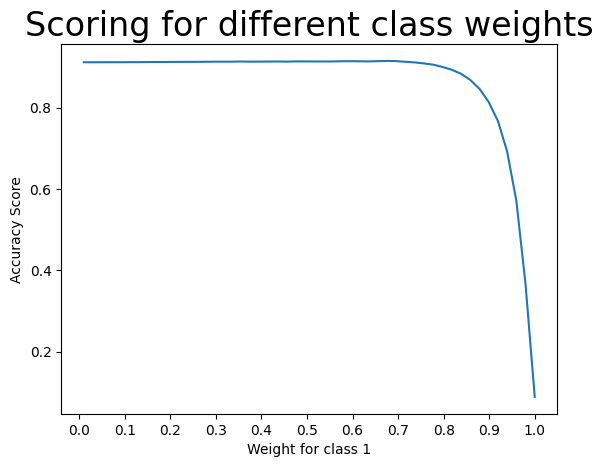

In [71]:
sns.lineplot(x=weigh_data['weight'], y=weigh_data['score'])
plt.xlabel('Weight for class 1')
plt.ylabel('Accuracy Score')
plt.xticks([round(i/10,1) for i in range(0,11,1)])
plt.title('Scoring for different class weights', fontsize=24)

In [72]:
gridsearch.best_params_

{'class_weight': {0: 0.32326530612244897, 1: 0.676734693877551}}

In [73]:
y_pred = gridsearch.predict(X_test_pca)
evaluateModel(y_test,y_pred)

AUC Score 0.66
Accuracy: 0.9143468950749465
F1 Score: 0.42168674698795183
Precision Score: 0.5239520958083832
Recall Score: 0.3528225806451613
Confusion Matrix: [[4949  159]
 [ 321  175]]
Sensitivity: 	0.35
Specificity: 	0.97


As the base model was having very low Accuracy and F1 score, and hence we can consider tuned model for LR

Accuracy is 91.4

### 6.b SVM

In [75]:
# Build base SVM model (no tuning)
svc=SVC() 
svc.fit(pca_components_df,y_train)
y_pred=svc.predict(X_test_pca)
evaluateModel(y_test,y_pred)

AUC Score 0.57
Accuracy: 0.9195217701641685
F1 Score: 0.25207296849087896
Precision Score: 0.7102803738317757
Recall Score: 0.1532258064516129
Confusion Matrix: [[5077   31]
 [ 420   76]]
Sensitivity: 	0.15
Specificity: 	0.99


Hyperparameter tuning

In [76]:
#Setting the range for class weights
weights = np.linspace(0.0,0.99,50)

#Creating a dictionary grid for grid search
param_grid = {'class_weight': [{0:x, 1:1.0-x} for x in weights]}

#Fitting grid search to the train data with 5 folds
gridsearch_ = GridSearchCV(estimator= svc, 
                          param_grid= param_grid,
                          cv=StratifiedKFold(), 
                          n_jobs=-1, 
                          scoring='accuracy', 
                          verbose=2).fit(X_train, y_train)

gridsearch.best_params_

Fitting 5 folds for each of 50 candidates, totalling 250 fits


/anaconda/envs/azureml_py38/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/anaconda/envs/azureml_py38/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/anaconda/envs/azureml_py38/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/anaconda/envs/azureml_py38/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was e

{'class_weight': {0: 0.32326530612244897, 1: 0.676734693877551}}

In [77]:
svc=SVC(class_weight= {0: 0.32326530612244897, 1: 0.676734693877551}) 
svc.fit(pca_components_df,y_train)
y_pred=svc.predict(X_test_pca)

evaluateModel(y_test,y_pred)

AUC Score 0.68
Accuracy: 0.9182726623840114
F1 Score: 0.4624413145539906
Precision Score: 0.5533707865168539
Recall Score: 0.3971774193548387
Confusion Matrix: [[4949  159]
 [ 299  197]]
Sensitivity: 	0.4
Specificity: 	0.97


Accuracy of tuned SVM model is 91.8 and with a better F1 score of 46.2

### 6.c XGBoost

In [78]:
from xgboost import XGBClassifier
# import XGBoost
import xgboost as xgb

# declare parameters
params = {
            'objective':'binary:logistic',
            'max_depth': 4,
            'alpha': 10,
            'learning_rate': 1.0,
            'n_estimators':100,
            "class_weight": "balanced"
        }
            
# instantiate the classifier 
xgb_clf = XGBClassifier(**params)

# fit the classifier to the training data
xgb_clf.fit(pca_components_df, y_train)
# make predictions on test data
y_pred = xgb_clf.predict(X_test_pca)

evaluateModel(y_test, y_pred)

[16:32:16] WARNING: /mnt/xgboost/src/learner.cc:541: 
Parameters: { class_weight } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[16:32:16] WARNING: /mnt/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
AUC Score 0.62
Accuracy: 0.9157744468236974
F1 Score: 0.34444444444444444
Precision Score: 0.5535714285714286
Recall Score: 0.25
Confusion Matrix: [[5008  100]
 [ 372  124]]
Sensitivity: 	0.25
Specificity: 	0.98


Hyperparameter tuning using HyperOpt (for faster optimization of XGBoost)

In [115]:
from hyperopt import hp, fmin, tpe, STATUS_OK, Trials

weights = [1, 10, 25, 50, 75, 99, 100]

space = { 'scale_pos_weight': hp.choice('scale_pos_weight',weights),
    'max_depth' : hp.choice('max_depth',[4,5,6,7,8]),
    'learning_rate': hp.choice('learning_rate',[0.1,0.001,0.01,0.2,1])
    }

def objective(space):
    xgb_clf = XGBClassifier(max_depth = space['max_depth'],
                            learning_rate = space['learning_rate'],
                            scale_pos_weight = space['scale_pos_weight'],
                            n_estimators=100)
    xgb_clf.fit(pca_components_df, y_train)
    y_pred = xgb_clf.predict(X_test_pca)
    accuracy = accuracy_score(y_test,y_pred)
    return {'loss': -accuracy, 'status': STATUS_OK, 'model': xgb_clf }
    
trials = Trials()
best = fmin(fn= objective,
            space= space,
            algo= tpe.suggest,
            max_evals = 100,
            # n_jobs=-1,
            trials= trials)
best

[17:26:39] WARNING: /mnt/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:26:41] WARNING: /mnt/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:26:44] WARNING: /mnt/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:26:46] WARNING: /mnt/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_me

{'learning_rate': 3, 'max_depth': 0, 'scale_pos_weight': 0}

In [116]:
xgb_tuned_params = best

In [117]:
xgb_tuned = trials.results[np.argmin([r['loss'] for r in trials.results])]['model']

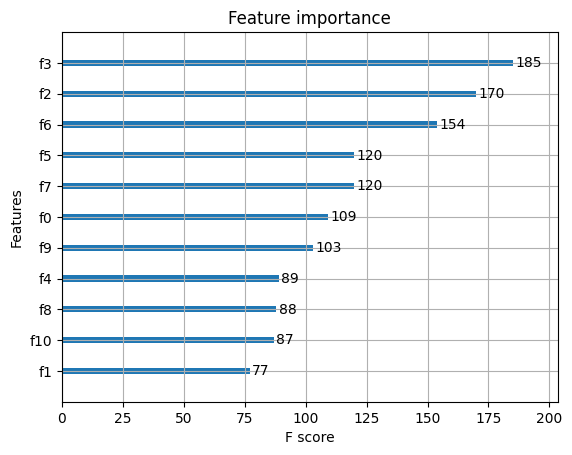

<Figure size 1600x1200 with 0 Axes>

In [118]:
xgb.plot_importance(xgb_tuned)
plt.figure(figsize = (16, 12))
plt.show()

In [119]:
# make predictions on test data
y_pred = xgb_tuned.predict(X_test_pca)
evaluateModel(y_test, y_pred)

AUC Score 0.62
Accuracy: 0.9225553176302641
F1 Score: 0.3579881656804734
Precision Score: 0.6722222222222223
Recall Score: 0.2439516129032258
Confusion Matrix: [[5049   59]
 [ 375  121]]
Sensitivity: 	0.24
Specificity: 	0.99


With XG Boost so far accuracy is maximum 92.2

### 6.d Random Forest Classifier

In [87]:
rfc = RandomForestClassifier(class_weight="balanced")

rfc.fit(pca_components_df, y_train)
y_pred = rfc.predict(X_test_pca)
evaluateModel(y_test, y_pred)


AUC Score 0.51
Accuracy: 0.910956459671663
F1 Score: 0.023483365949119372
Precision Score: 0.4
Recall Score: 0.012096774193548387
Confusion Matrix: [[5099    9]
 [ 490    6]]
Sensitivity: 	0.01
Specificity: 	1.0


In [92]:
weights = np.linspace(0.0,0.99,50)

space = { 'class_weight': hp.choice('class_weight',[{0:x, 1:1.0-x} for x in weights]),
    'n_estimators': hp.choice('n_estimators', np.arange(10, 200, 10)),
    'max_depth': hp.choice('max_depth', np.arange(1, 20, 1)),
    'min_samples_split': hp.uniform('min_samples_split', 0.1, 1.0),
    'min_samples_leaf': hp.uniform('min_samples_leaf', 0.1, 0.5),
    'max_features': hp.choice('max_features', range(1,14))
}

def objective(params):
    rfc = RandomForestClassifier(
                            class_weight = params['class_weight'],
                             n_estimators=int(params['n_estimators']),
        max_depth=int(params['max_depth']),
        min_samples_split=params['min_samples_split'],
        min_samples_leaf=params['min_samples_leaf'],
        max_features=params['max_features'],
        random_state=42, verbose=True, n_jobs=-1
    )
    rfc.fit(pca_components_df, y_train)
    y_pred = rfc.predict(X_test_pca)
    accuracy = accuracy_score(y_test,y_pred)
    return {'loss': -accuracy, 'status': STATUS_OK, 'model': rfc }
    
trials = Trials()
best = fmin(fn= objective,
            space= space,
            algo= tpe.suggest,
            max_evals = 50,
            trials= trials)
best

100%|██████████| 50/50 [00:27<00:00,  1.81trial/s, best loss: -0.9114917915774446]


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.

[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s

[Parallel(n_jobs=-1)]: Done 140 out of 140 | elapsed:    0.5s finished

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.

[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s

[Parallel(n_jobs=8)]: Done 140 out of 140 | elapsed:    0.1s finished

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.

[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s

[Parallel(n_jobs=-1)]: Done  70 out of  70 | elapsed:    0.2s finished

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.

[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s

[Parallel(n_jobs=8)]: Done  70 out of  70 | elapsed:    0.0s finished

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.

[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   

{'class_weight': 8,
 'max_depth': 10,
 'max_features': 11,
 'min_samples_leaf': 0.20463033574713388,
 'min_samples_split': 0.7559892167760629,
 'n_estimators': 13}

In [93]:
rfc_tuned = trials.results[np.argmin([r['loss'] for r in trials.results])]['model']

In [94]:
# make predictions on test data
y_pred = rfc_tuned.predict(X_test_pca)
evaluateModel(y_test, y_pred)

AUC Score 0.5
Accuracy: 0.9114917915774446
F1 Score: 0.0
Precision Score: 0.0
Recall Score: 0.0
Confusion Matrix: [[5108    0]
 [ 496    0]]
Sensitivity: 	0.0
Specificity: 	1.0


[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 140 out of 140 | elapsed:    0.1s finished


Accuracy is 91.14 however, F1 score is 0 hence the tuned model is not good to be used

## 7. Model Selection & Evaluation

As per the observation, XGBoost tuned model is the most relevant model with accuracy score of 92.26

Let's build a pipeline to fit and score the model faster

The steps of this pipeline would be the following, but this is only one type of pipeline -

1. Imputation
2. Scaling
3. PCA
4. Classification model

SVC(class_weight= {0: 0.32326530612244897, 1: 0.676734693877551}) 

XGBClassifier(**xgb_tuned_params, eval_metric="aucpr")

LogisticRegression(class_weight= {0: 0.32326530612244897, 1: 0.676734693877551})

In [132]:
imp = SimpleImputer(strategy='constant', fill_value=0)
scale = StandardScaler()
pca = PCA(n_components=11)
xgb_cf = XGBClassifier(**xgb_tuned_params, eval_metric="aucpr")
svc_final = SVC(class_weight= {0: 0.32326530612244897, 1: 0.676734693877551})
lr_final = LogisticRegression(class_weight= {0: 0.32326530612244897, 1: 0.676734693877551}) 

In [ ]:
pca_by_variance(X_test[variables])

In [134]:
pipe_xgb_cf = Pipeline(steps = [('imputation',imp),
                         ('scaling',scale),
                         ('pca',pca),
                         ('model',xgb_cf)])

In [133]:
pipe_svc_final = Pipeline(steps = [('imputation',imp),
                         ('scaling',scale),
                         ('pca',pca),
                         ('model',svc_final)])

In [135]:
pipe_lr_final = Pipeline(steps = [('imputation',imp),
                         ('scaling',scale),
                         ('pca',pca),
                         ('model',lr_final)])

In [137]:
pipe_xgb_cf.fit(X_train[variables], y_train)
train_score = pipe_xgb_cf.score(X_train[variables], y_train)
print("Training accuracy:", train_score)

Training accuracy: 0.9115770689270578


In [140]:
xgb_pred = pipe_xgb_cf.predict(X_test[variables])
evaluateModel(y_test,xgb_pred)

AUC Score 0.5
Accuracy: 0.9114917915774446
F1 Score: 0.0
Precision Score: 0.0
Recall Score: 0.0
Confusion Matrix: [[5108    0]
 [ 496    0]]
Sensitivity: 	0.0
Specificity: 	1.0


In [138]:
pipe_svc_final.fit(X_train[variables], y_train)
train_score = pipe_svc_final.score(X_train[variables], y_train)
print("Training accuracy:", train_score)

Training accuracy: 0.9228195404862815


##### Evaluation metrics for test data

In [141]:
svc_pred = pipe_svc_final.predict(X_test[variables])
evaluateModel(y_test,svc_pred)

AUC Score 0.73
Accuracy: 0.9223768736616702
F1 Score: 0.5266594124047878
Precision Score: 0.5721040189125296
Recall Score: 0.4879032258064516
Confusion Matrix: [[4927  181]
 [ 254  242]]
Sensitivity: 	0.49
Specificity: 	0.96


In [139]:
pipe_lr_final.fit(X_train[variables], y_train)
train_score = pipe_lr_final.score(X_train[variables], y_train)
print("Training accuracy:", train_score)

Training accuracy: 0.9139861699754629


In [142]:
lr_pred = pipe_lr_final.predict(X_test[variables])
evaluateModel(y_test,lr_pred)

AUC Score 0.69
Accuracy: 0.9186295503211992
F1 Score: 0.46976744186046515
Precision Score: 0.554945054945055
Recall Score: 0.40725806451612906
Confusion Matrix: [[4946  162]
 [ 294  202]]
Sensitivity: 	0.41
Specificity: 	0.97


## 8. Conclusion

Even though XGBoost was performing good in training phase but it is not handling class imbalance and hence gave poor F1 score in testing

Best model accuracy is observed to be that of SVM model which is **92.2**

## 9. Prediction on test and unseen dataset: Creating submission file

For submission, we need to make sure that the format is exactly the same as the sample.csv file. It contains 2 columns, id and churn_probability

In [143]:
sample.head()

id  churn_probability
0  69999                  0
1  70000                  0
2  70001                  0
3  70002                  0
4  70003                  0

The submission file should contain churn_probability values that have to be predicted for the unseen data provided (test.csv)

In [144]:
unseen.head()

id  circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  \
0  69999        109             0.0             0.0             0.0   
1  70000        109             0.0             0.0             0.0   
2  70001        109             0.0             0.0             0.0   
3  70002        109             0.0             0.0             0.0   
4  70003        109             0.0             0.0             0.0   

  last_date_of_month_6 last_date_of_month_7 last_date_of_month_8   arpu_6  \
0            6/30/2014            7/31/2014            8/31/2014   91.882   
1            6/30/2014            7/31/2014            8/31/2014  414.168   
2            6/30/2014            7/31/2014            8/31/2014  329.844   
3            6/30/2014            7/31/2014            8/31/2014   43.550   
4            6/30/2014            7/31/2014            8/31/2014  306.854   

    arpu_7   arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  offnet_mou_6  \
0   65.330   64.445        31.78        20.23        23.11         60.16   
1  515.568  360.868        75.51        41.21        19.84        474.34   
2  434.884  746.239         7.54         7.86         8.40         16.98   
3  171.390   24.400         5.31         2.16         0.00         40.04   
4  406.289  413.329       450.93       609.03       700.68         60.94   

   offnet_mou_7  offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  \
0         32.16         34.83           0.00           0.00           0.00   
1        621.84        394.94           0.00           0.00           0.00   
2         45.81         45.04          22.81         103.38          26.08   
3        205.01         24.01           0.00           0.00           0.00   
4         23.84         74.16           0.00           0.00           0.00   

   roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  loc_og_t2t_mou_6  \
0           0.00           0.00           0.00             24.88   
1           0.00           0.00           0.00             75.51   
2          24.53          53.68          54.44              0.00   
3           0.00           0.00           0.00              5.31   
4           0.00           0.00           0.00              0.45   

   loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  loc_og_t2m_mou_7  \
0             20.23             21.06             18.13             10.89   
1             41.21             19.84            473.61            598.08   
2              0.00              0.00              0.00              0.00   
3              0.00              0.00              2.94             98.61   
4              0.78             14.56              2.39              2.66   

   loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  \
0              8.36              0.00             13.58              0.00   
1            377.26              0.73              0.00              0.00   
2              0.00              0.00              0.00              0.00   
3             20.51              0.00              0.00              2.35   
4             10.94              0.00              0.00              0.00   

   loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  loc_og_mou_6  \
0               0.0              0.00              0.03         43.01   
1               0.0              0.00              0.00        549.86   
2               0.0              0.00              0.00          0.00   
3               0.0              6.18              0.00          8.26   
4               0.0              0.00              0.00          2.84   

   loc_og_mou_7  loc_og_mou_8  std_og_t2t_mou_6  std_og_t2t_mou_7  \
0         44.71         29.43              6.90              0.00   
1        639.29        397.11              0.00              0.00   
2          0.00          0.00              0.00              0.00   
3         98.61         22.86              0.00              2.16   
4          3.44         25.51            450.48            608.24   

 

Lets first select the columns that we want to work with (or create them, if you have done any feature engineering)

In [145]:
submission_data = unseen.set_index('id')[variables]
submission_data.shape

(30000, 26)

Next, lets create a new column in the unseen dataset called churn_probability and use the model pipeline to predict the probabilities for this data

In [146]:
unseen['churn_probability'] = pipe_svc_final.predict(submission_data)
output = unseen[['id','churn_probability']]
output.head()

id  churn_probability
0  69999                  0
1  70000                  0
2  70001                  0
3  70002                  0
4  70003                  0

Finally, lets create a csv file out of this dataset, ensuring to set index=False to avoid an addition column in the csv.

In [147]:
output.to_csv('submission_pca_svc.csv',index=False)